# D·ª± √°n: Ph√¢n t√≠ch d·ªØ li·ªáu tuy·ªÉn d·ª•ng

## Import c√°c th∆∞ vi·ªán

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# import kagglehub
import math
from ipywidgets import interact
import warnings
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
warnings.filterwarnings('ignore')

## ƒê·ªçc d·ªØ li·ªáu

In [2]:
# Hi·ªán t·∫°i ƒëang b·ªã l·ªói

# # Download latest version
# path = kagglehub.dataset_download("bismasajjad/global-ai-job-market-and-salary-trends-2025")

# print("Path to dataset files:", path)
# df = pd.read_csv(path + '\\ai_job_dataset.csv')

df = pd.read_csv('ai_job_dataset1.csv')

## Xem qua d·ªØ li·ªáu

In [3]:
df.head()

job_id                 job_title  salary_usd salary_currency  \
0  AI00001            Data Scientist      219728             USD   
1  AI00002                Head of AI      230237             JPY   
2  AI00003             Data Engineer      128890             EUR   
3  AI00004  Computer Vision Engineer       96349             USD   
4  AI00005         Robotics Engineer       63065             EUR   

   salary_local experience_level employment_type company_location  \
0        219728               EX              PT           Sweden   
1      25326070               EX              PT            Japan   
2        109557               EX              CT          Germany   
3         96349               MI              FL          Finland   
4         53605               EN              FT           France   

  company_size employee_residence  remote_ratio  \
0            M             Sweden             0   
1            L              Japan            50   
2            S            Germany           100   
3            L            Finland            50   
4            S             France           100   

                      required_skills education_required  years_experience  \
0  Python, Computer Vision, R, Docker          Associate                13   
1  Kubernetes, MLOps, Tableau, Python           Bachelor                10   
2  Spark, Scala, Hadoop, PyTorch, GCP           Bachelor                12   
3       MLOps, Linux, Tableau, Python                PhD                 2   
4          R, Scala, SQL, GCP, Python          Associate                 0   

         industry posting_date application_deadline  job_description_length  \
0  Transportation   2024-09-23           2024-10-31                    1132   
1  Transportation   2024-07-26           2024-09-12                    2299   
2      Automotive   2025-01-19           2025-03-28                    1329   
3      Automotive   2024-07-20           2024-09-06                    1132   
4         Finance   2025-03-16           2025-05-09                    2011   

   benefits_score           company_name  
0             6.6           TechCorp Inc  
1             8.5     Cloud AI Solutions  
2             5.5  Quantum Computing Inc  
3             6.8    Cognitive Computing  
4             9.3      Advanced Robotics

In [10]:
df["employee_residence"].unique()

array(['Sweden', 'Japan', 'Germany', 'Finland', 'France', 'Norway',
       'Poland', 'Vietnam', 'United Kingdom', 'Denmark', 'United States',
       'Belgium', 'India', 'Switzerland', 'Singapore', 'Netherlands',
       'Ireland', 'Argentina', 'Australia', 'Austria', 'South Korea',
       'Hungary', 'Luxembourg', 'China', 'Canada', 'Malaysia', 'Israel',
       'Ghana', 'Portugal', 'Czech Republic', 'Philippines', 'Italy',
       'Estonia', 'Thailand', 'Colombia', 'Indonesia', 'Kenya', 'Chile',
       'Russia', 'South Africa', 'Spain', 'Turkey', 'Brazil', 'Romania',
       'Ukraine', 'Mexico', 'Egypt', 'Nigeria', 'New Zealand', 'Latvia'],
      dtype=object)

In [11]:
df["job_title"].unique()

array(['Data Scientist', 'Head of AI', 'Data Engineer',
       'Computer Vision Engineer', 'Robotics Engineer', 'AI Consultant',
       'Machine Learning Engineer', 'Deep Learning Engineer',
       'Principal Data Scientist', 'AI Product Manager',
       'Machine Learning Researcher', 'AI Software Engineer',
       'ML Ops Engineer', 'AI Architect', 'AI Specialist', 'Data Analyst',
       'Research Scientist', 'Autonomous Systems Engineer',
       'NLP Engineer', 'AI Research Scientist'], dtype=object)

In [12]:
df["company_location"].unique()

array(['Sweden', 'Japan', 'Germany', 'Finland', 'France', 'Singapore',
       'Canada', 'Australia', 'United Kingdom', 'Denmark',
       'United States', 'Norway', 'India', 'Switzerland', 'Netherlands',
       'Ireland', 'Austria', 'China', 'Israel', 'South Korea'],
      dtype=object)

In [13]:
df["industry"].unique()

array(['Transportation', 'Automotive', 'Finance', 'Technology', 'Gaming',
       'Consulting', 'Government', 'Telecommunications', 'Healthcare',
       'Education', 'Energy', 'Real Estate', 'Media', 'Retail',
       'Manufacturing'], dtype=object)

### **M√¥ t·∫£ c√°c c·ªôt trong b·ªô d·ªØ li·ªáu**

| T√™n C·ªôt (Column Name) | M√¥ t·∫£ Ti·∫øng Vi·ªát (Vietnamese Description) | Ki·ªÉu d·ªØ li·ªáu (Data Type) |
| :--- | :--- | :--- |
| `job_id` | M√£ ƒë·ªãnh danh duy nh·∫•t cho m·ªói tin tuy·ªÉn d·ª•ng. | String |
| `job_title` | Ch·ª©c danh c√¥ng vi·ªác ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a. | String |
| `salary_usd` | M·ª©c l∆∞∆°ng h√†ng nƒÉm t√≠nh b·∫±ng USD. | Integer |
| `salary_currency` | ƒê∆°n v·ªã ti·ªÅn t·ªá c·ªßa m·ª©c l∆∞∆°ng g·ªëc. | String |
| `experience_level` | C·∫•p ƒë·ªô kinh nghi·ªám: EN (M·ªõi v√†o ngh·ªÅ), MI (Trung c·∫•p), SE (Cao c·∫•p), EX (Chuy√™n gia/ƒêi·ªÅu h√†nh). | String |
| `employment_type` | Lo·∫°i h√¨nh c√¥ng vi·ªác: FT (To√†n th·ªùi gian), PT (B√°n th·ªùi gian), CT (H·ª£p ƒë·ªìng), FL (L√†m t·ª± do). | String |
| `company_location` | Qu·ªëc gia n∆°i c√¥ng ty ƒë·∫∑t tr·ª• s·ªü. | String |
| `company_size` | Quy m√¥ c√¥ng ty: S (Nh·ªè <50), M (V·ª´a 50-250), L (L·ªõn >250). | String |
| `employee_residence` | Qu·ªëc gia n∆°i nh√¢n vi√™n c∆∞ tr√∫. | String |
| `remote_ratio` | T·ª∑ l·ªá l√†m vi·ªác t·ª´ xa: 0 (Kh√¥ng l√†m t·ª´ xa), 50 (K·∫øt h·ª£p/Hybrid), 100 (L√†m t·ª´ xa ho√†n to√†n). | Integer |
| `required_skills` | 5 k·ªπ nƒÉng h√†ng ƒë·∫ßu ƒë∆∞·ª£c y√™u c·∫ßu (ph√¢n t√°ch b·∫±ng d·∫•u ph·∫©y). | String |
| `education_required` | Y√™u c·∫ßu h·ªçc v·∫•n t·ªëi thi·ªÉu. | String |
| `years_experience` | S·ªë nƒÉm kinh nghi·ªám y√™u c·∫ßu. | Integer |
| `industry` | Lƒ©nh v·ª±c/ng√†nh ngh·ªÅ c·ªßa c√¥ng ty. | String |
| `posting_date` | Ng√†y ƒëƒÉng tin tuy·ªÉn d·ª•ng. | Date |
| `application_deadline`| H·∫°n ch√≥t n·ªôp h·ªì s∆°. | Date |
| `job_description_length` | ƒê·ªô d√†i c·ªßa m√¥ t·∫£ c√¥ng vi·ªác (s·ªë l∆∞·ª£ng k√Ω t·ª±). | Integer |
| `benefits_score` | ƒêi·ªÉm s·ªë ƒë√°nh gi√° c√°c g√≥i ph√∫c l·ª£i (t·ª´ 1-10). | Float |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

**Nh·∫≠n x√©t**: C√≥ v·∫ª nh∆∞ kh√¥ng t·ªìn t·∫°i d√≤ng n√†o thi·∫øu v√† d·ªØ li·ªáu nhi·ªÅu ·ªü d·∫°ng string

In [6]:
df.describe()

salary_usd  salary_local  remote_ratio  years_experience  \
count   15000.000000  1.500000e+04  15000.000000      15000.000000   
mean   121991.938267  8.292366e+05     50.196667          6.365667   
std     63968.361846  3.425325e+06     40.844084          5.598551   
min     16621.000000  1.662100e+04      0.000000          0.000000   
25%     74978.500000  7.383075e+04      0.000000          2.000000   
50%    107261.500000  1.090355e+05     50.000000          5.000000   
75%    155752.250000  1.673278e+05    100.000000         10.000000   
max    410273.000000  3.368541e+07    100.000000         19.000000   

       job_description_length  benefits_score  
count            15000.000000    15000.000000  
mean              1500.852600        7.499540  
std                574.724647        1.444202  
min                500.000000        5.000000  
25%                998.750000        6.300000  
50%               1512.000000        7.500000  
75%               1994.000000        8.800000  
max               2499.000000       10.000000

**M·ªôt v√†i ƒëi·ªÅu hay ho khi nh√¨n trung ·ªü th·ªã tr∆∞·ªùng nh∆∞ sau**:  
1. C√≥ t·ªìn t·∫°i m·ªôt v√†i TH ƒë·∫∑c bi·ªát c√≥ m·ª©c l∆∞∆°ng cao ~400k $ m·ªôt nƒÉm, quy ra ti·ªÅn vi·ªát l√† kho·∫£ng 10 t·ª∑ m·ªôt nƒÉm.
2. B√°m s√°t v√†o m·ª©c l∆∞∆°ng trung v·ªã (do c·ªôt salary t·ªìn t·∫°i c√°c ngo·∫°i l·ªá), ta th·∫•y median r∆°i v√†o kho·∫£ng 150k $ m·ªôt nƒÉm. So s√°nh v·ªõi m·ª©c l∆∞∆°ng trung b√¨nh h√†ng nƒÉm t·∫°i M·ªπ nƒÉm 2024 dao ƒë·ªông kho·∫£ng 59.228 USD ƒë·∫øn 63.171 USD th√¨ ta th·∫•y con s·ªë tr√™n l√† kh√° ·∫•n t∆∞·ª£ng, cho th·∫•y s·ª©c n√≥ng c·ªßa c√°c ngh√†nh ngh·ªÅ tr√™n 
3. Trung b√¨nh c√°c c√¥ng ty th∆∞·ªùng tuy·ªÉn d·ª•ng c√°c v·ªã tr√≠ c√≥ s·ªë nƒÉm kinh nghi·ªám r∆°i v√†o kho·∫£ng 5+ tr·ªü l√™n
3. Kh√¥ng c√≥ c√¥ng ty n√†o l√† kh√¥ng c√≥ ph√∫c l·ª£i (benefit_score=0 v√¨ min c·ªßa c·ªôt n√†y b·∫±ng 5). Cho th·∫•y s·ª± quan t√¢m c·ªßa c√°c doanh nghi·ªáp ƒë·∫øn ng∆∞·ªùi lao ƒë·ªông. Trong m·ªôt s·ªë tr∆∞·ªùng h·ª£p v√† v·ªã tr√≠, ph√∫c l·ª£i c√≥ th·ªÉ l√™n ƒë·∫øn max 10 (cao nh·∫•t)  

**V·ªÅ m·∫∑t d·ªØ li·ªáu**: Kh√¥ng nh√¨n th·∫•y c√°c gi√° tr·ªã n√†o b·∫•t h·ª£p l√Ω trong range c·ªßa c√°c gi√° tr·ªã s·ªë

# Data Analyst Role

### Ki·ªÉm tra v√† l√†m s·∫°ch d·ªØ li·ªáu

1. Chuy·ªÉn ƒë·ªïi ki·ªÉu d·ªØ li·ªáu c·ªßa c√°c c·ªôt ng√†y th√°ng nƒÉm

In [7]:
# ƒê·ªïi ki·ªÉu d·ªØ li·ªáu datetime cho posting_date, application_date
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

2. X√≥a tr√πng

In [8]:
df.drop_duplicates(inplace=True)

Tuy nhi√™n x√≥a tr√πng nh∆∞ n√†y ch∆∞a ƒë·∫£m b·∫£o l·ªçc ƒë∆∞·ª£c tr√πng ho√†n to√†n. Theo t√¥i, ta c·∫ßn x√≥a tr√πng d·ª±a v√†o 1 v√†i th√¥ng tin nh∆∞ d∆∞·ªõi

In [9]:
subset_col = ['company_name', 'job_title', 'company_location', 'employment_type', 'posting_date']
df.drop_duplicates(subset=subset_col, inplace=True)

Lo·∫°i b·ªè ƒëi c√°c c·ªôt c√≥ application_deadline < posting_date

In [10]:
df = df[df["application_deadline"] > df["posting_date"]]

3. Xem qua t·∫≠p d·ªØ li·ªáu c√°c c·ªôt

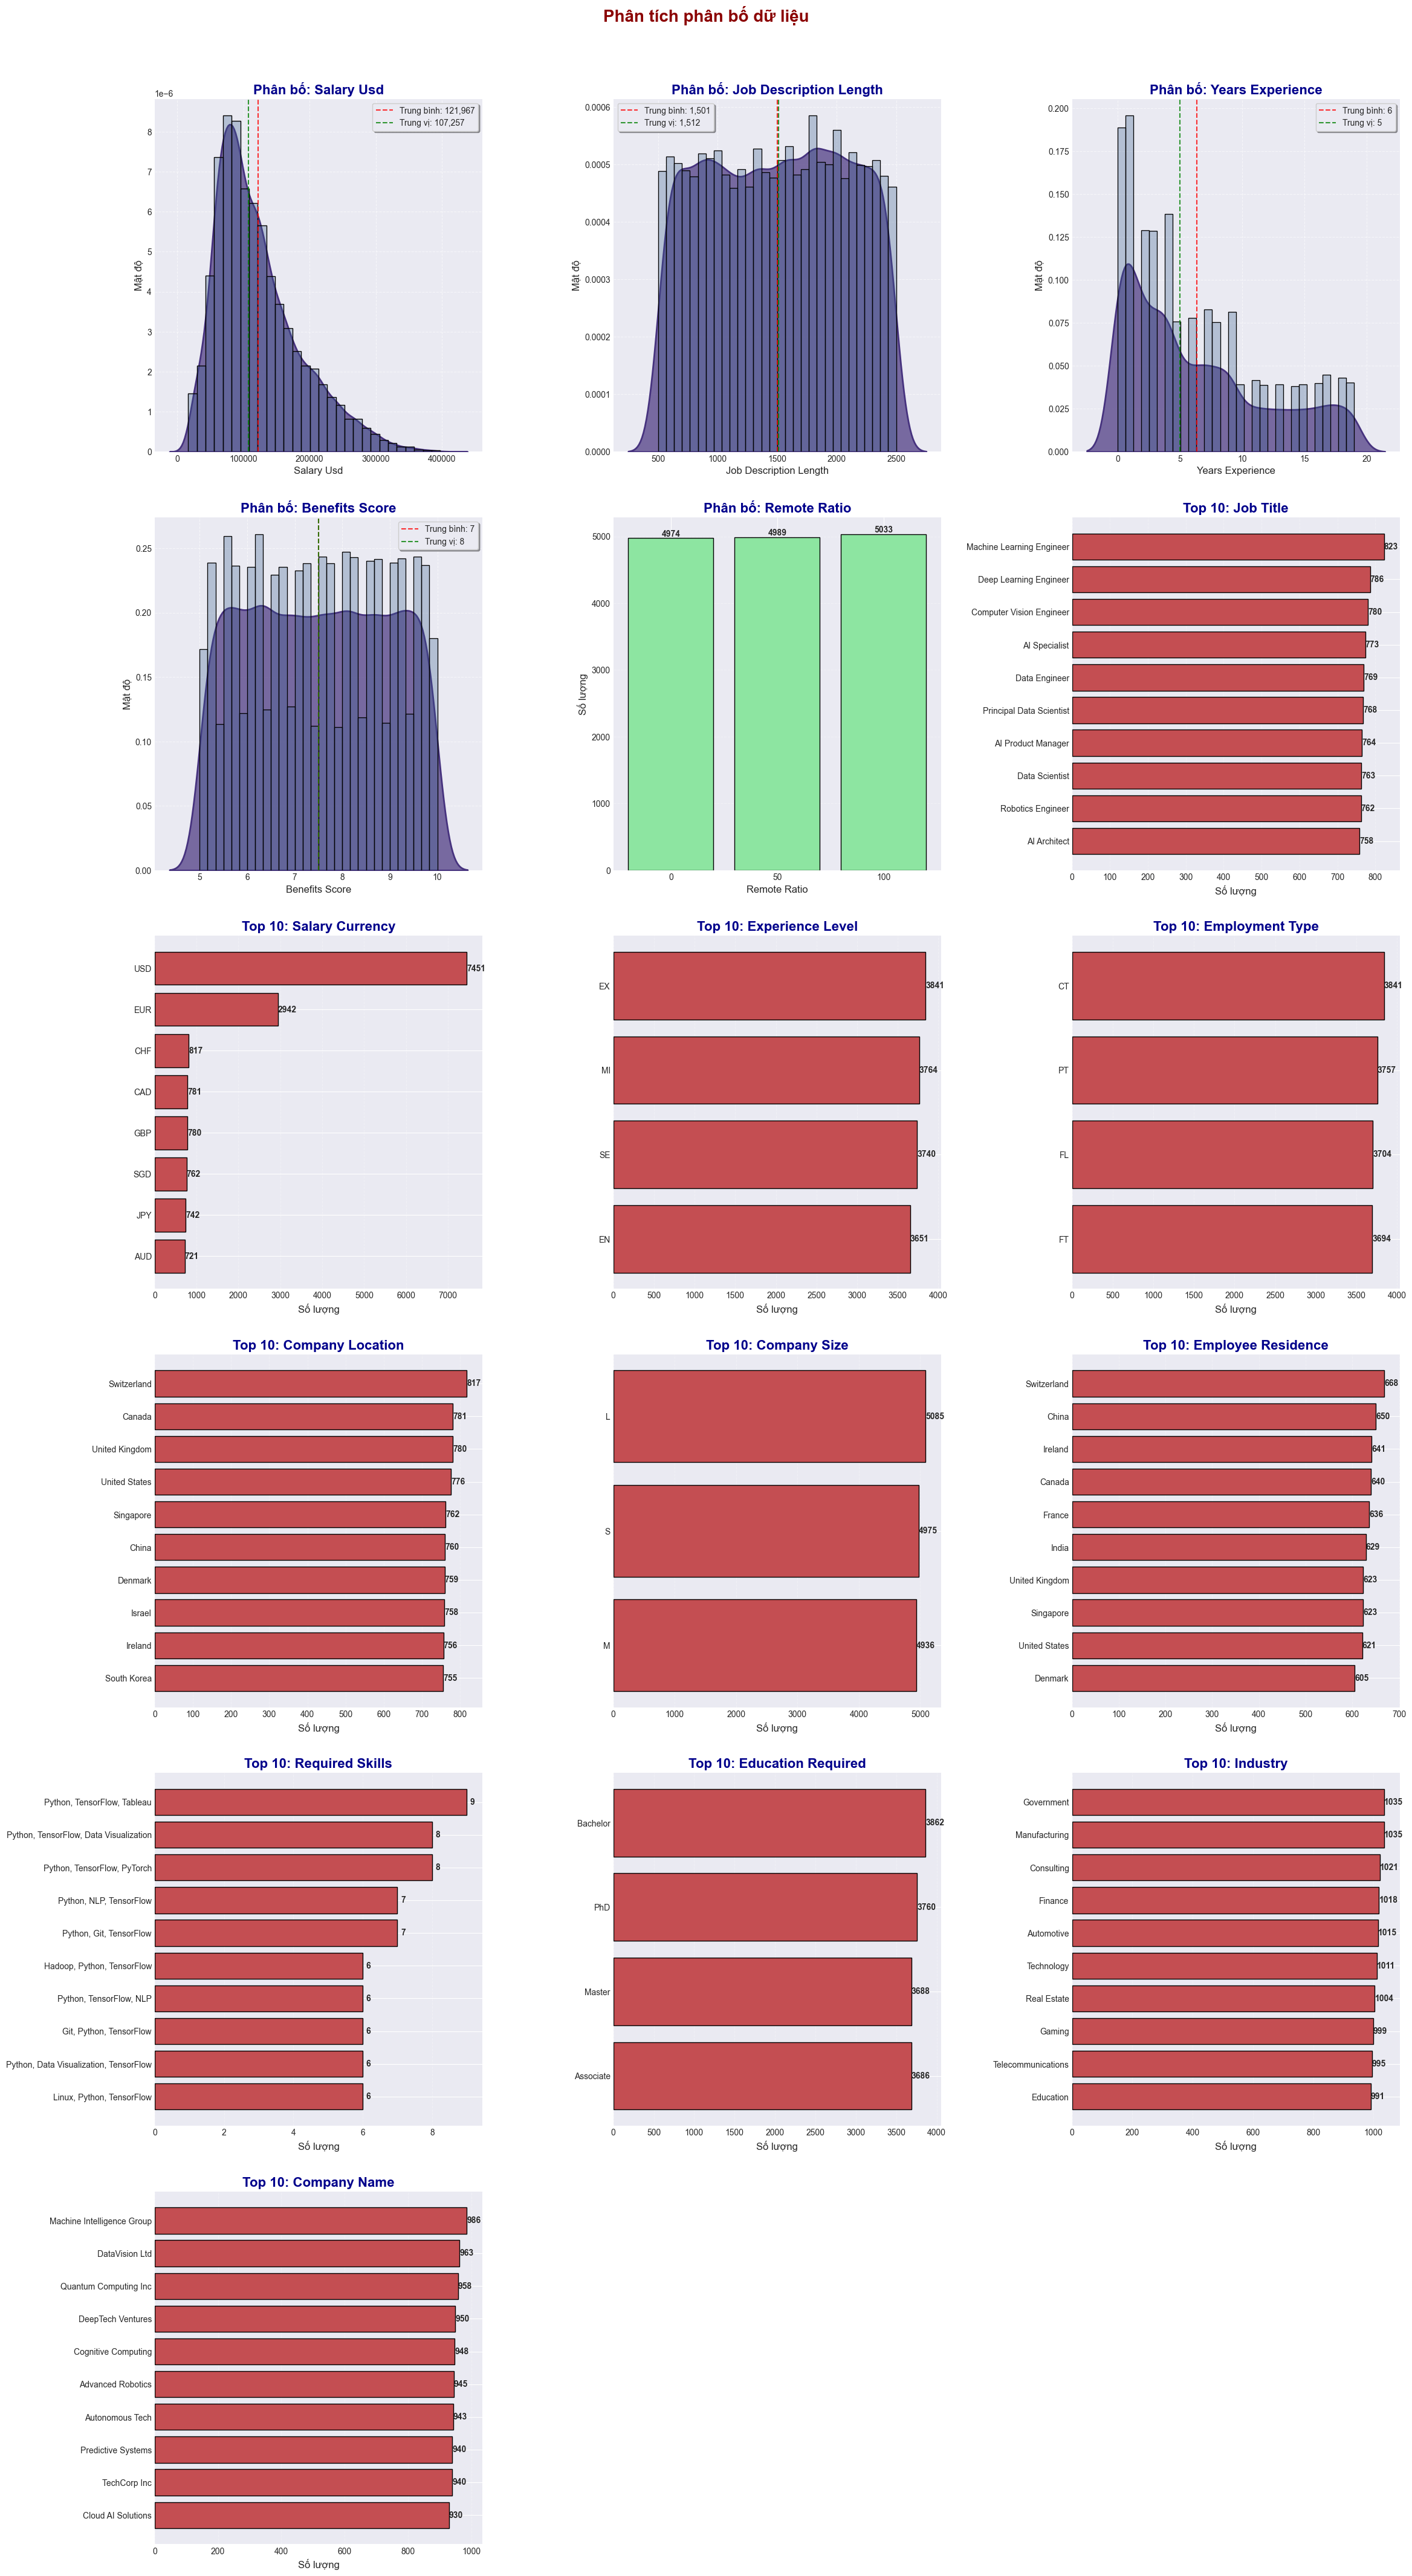

In [11]:
# ƒê·ªãnh nghƒ©a c√°c c·ªôt
str_columns = [col for col in df.select_dtypes(include=['object']).columns if col != 'job_id']
continuous_columns = ['salary_usd', 'job_description_length', 'years_experience', 'benefits_score']
discrete_column = ['remote_ratio']

# T·ªïng s·ªë bi·ªÉu ƒë·ªì c·∫ßn v·∫Ω
total_plots = len(continuous_columns) + len(discrete_column) + len(str_columns)

# T√≠nh s·ªë d√≤ng c·∫ßn thi·∫øt (3 c·ªôt m·ªói d√≤ng)
n_rows = math.ceil(total_plots / 3)

# C·∫£i thi·ªán: S·ª≠ d·ª•ng style c·ªßa seaborn ƒë·ªÉ c√≥ giao di·ªán ƒë·∫πp h∆°n
# ƒê·∫£m b·∫£o seaborn ƒë√£ ƒë∆∞·ª£c import (v√≠ d·ª•: import seaborn as sns)
# v√† matplotlib.pyplot ƒë√£ ƒë∆∞·ª£c import (v√≠ d·ª•: import matplotlib.pyplot as plt)
plt.style.use('seaborn-v0_8-darkgrid') # Ho·∫∑c 'ggplot', 'fivethirtyeight' ƒë·ªÉ th·ª≠ c√°c phong c√°ch kh√°c

# T·∫°o figure v·ªõi subplot
# C·∫£i thi·ªán: TƒÉng k√≠ch th∆∞·ªõc figure ƒë·ªÉ bi·ªÉu ƒë·ªì r√µ r√†ng h∆°n v√† c√≥ kh√¥ng gian h∆°n
fig, axes = plt.subplots(n_rows, 3, figsize=(24, 7 * n_rows)) # TƒÉng chi·ªÅu r·ªông v√† chi·ªÅu cao
axes = axes.flatten()  # Chuy·ªÉn th√†nh m·∫£ng 1 chi·ªÅu ƒë·ªÉ d·ªÖ truy c·∫≠p

# ƒê·∫øm v·ªã tr√≠ hi·ªán t·∫°i
plot_idx = 0

# 1. V·∫Ω KDE plot cho c√°c bi·∫øn continuous
for col in continuous_columns:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # C·∫£i thi·ªán: S·ª≠ d·ª•ng sns.kdeplot v√† sns.histplot ƒë·ªÉ t·∫≠n d·ª•ng c√°c t√≠nh nƒÉng c·ªßa seaborn
        # S·ª≠ d·ª•ng m√†u s·∫Øc t·ª´ palette c·ªßa seaborn ƒë·ªÉ c√≥ s·ª± nh·∫•t qu√°n v√† h·∫•p d·∫´n h∆°n
        sns.kdeplot(df[col], ax=ax, fill=True, color=sns.color_palette("viridis")[0], alpha=0.7, linewidth=2)
        
        # Th√™m histogram m·ªù ph√≠a sau ƒë·ªÉ th·∫•y distribution r√µ h∆°n
        sns.histplot(df[col], ax=ax, bins=30, alpha=0.3, color=sns.color_palette("viridis")[1], stat='density', kde=False)
        
        # C·∫£i thi·ªán: Ti√™u ƒë·ªÅ r√µ r√†ng h∆°n, font l·ªõn h∆°n, m√†u s·∫Øc ƒë·∫≠m h∆°n
        ax.set_title(f'Ph√¢n b·ªë: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        # C·∫£i thi·ªán: K√≠ch th∆∞·ªõc ch·ªØ cho nh√£n tr·ª•c
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('M·∫≠t ƒë·ªô', fontsize=12)
        # C·∫£i thi·ªán: K√≠ch th∆∞·ªõc ch·ªØ cho c√°c gi√° tr·ªã tr√™n tr·ª•c
        ax.tick_params(axis='both', which='major', labelsize=10)
        # C·∫£i thi·ªán: Ki·ªÉu l∆∞·ªõi r√µ r√†ng h∆°n
        ax.grid(True, linestyle='--', alpha=0.6)
        
        # Th√™m vertical line cho mean v√† median
        mean_val = df[col].mean()
        median_val = df[col].median()
        # C·∫£i thi·ªán: Alpha cao h∆°n cho ƒë∆∞·ªùng trung b√¨nh/trung v·ªã
        ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Trung b√¨nh: {mean_val:,.0f}')
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Trung v·ªã: {median_val:,.0f}')
        # C·∫£i thi·ªán: Legend ƒë·∫πp h∆°n v·ªõi khung v√† ƒë·ªï b√≥ng
        ax.legend(fontsize=10, frameon=True, shadow=True)
        
        plot_idx += 1

# 2. V·∫Ω bar plot cho bi·∫øn discrete (remote_ratio)
for col in discrete_column:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # ƒê·∫øm t·∫ßn su·∫•t c·ªßa t·ª´ng gi√° tr·ªã
        value_counts = df[col].value_counts().sort_index()
        
        # C·∫£i thi·ªán: S·ª≠ d·ª•ng m√†u s·∫Øc kh√°c t·ª´ palette v√† th√™m vi·ªÅn cho c√°c c·ªôt
        bars = ax.bar(value_counts.index.astype(str), value_counts.values, color=sns.color_palette("pastel")[2], edgecolor='black')
        ax.set_title(f'Ph√¢n b·ªë: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        ax.set_xlabel(col.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('S·ªë l∆∞·ª£ng', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=10)
        ax.grid(True, alpha=0.3, axis='y', linestyle='--')
        
        # Th√™m gi√° tr·ªã tr√™n m·ªói c·ªôt
        for bar in bars:
            yval = bar.get_height()
            # C·∫£i thi·ªán: V·ªã tr√≠ v√† font c·ªßa gi√° tr·ªã tr√™n c·ªôt
            ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plot_idx += 1

# 3. V·∫Ω horizontal bar plot cho c√°c bi·∫øn string
for col in str_columns:
    if plot_idx < len(axes):
        ax = axes[plot_idx]
        # L·∫•y top 10 gi√° tr·ªã ph·ªï bi·∫øn nh·∫•t v√† s·∫Øp x·∫øp tƒÉng d·∫ßn ƒë·ªÉ d·ªÖ ƒë·ªçc
        top_values = df[col].value_counts().head(10).sort_values(ascending=True)
        
        # V·∫Ω horizontal bar plot
        y_pos = range(len(top_values))
        # C·∫£i thi·ªán: M√†u s·∫Øc v√† vi·ªÅn cho c√°c thanh
        bars = ax.barh(y_pos, top_values.values, color=sns.color_palette("deep")[3], edgecolor='black')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(top_values.index, fontsize=10)
        ax.set_title(f'Top 10: {col.replace("_", " ").title()}', fontsize=16, fontweight='bold', color='darkblue')
        ax.set_xlabel('S·ªë l∆∞·ª£ng', fontsize=12)
        ax.tick_params(axis='x', which='major', labelsize=10)
        ax.grid(True, alpha=0.3, axis='x', linestyle='--')
        
        # Th√™m gi√° tr·ªã tr√™n c√°c thanh
        for bar in bars:
            xval = bar.get_width()
            # C·∫£i thi·ªán: V·ªã tr√≠ v√† font c·ªßa gi√° tr·ªã tr√™n thanh
            ax.text(xval + 0.1, bar.get_y() + bar.get_height()/2, int(xval), va='center', fontsize=10, fontweight='bold')
        
        plot_idx += 1

# ·∫®n c√°c subplot th·ª´a
for idx in range(plot_idx, len(axes)):
    axes[idx].axis('off')

# ƒêi·ªÅu ch·ªânh layout
# C·∫£i thi·ªán: Th√™m padding gi·ªØa c√°c subplot
plt.tight_layout(pad=3.0)
# C·∫£i thi·ªán: Th√™m ti√™u ƒë·ªÅ chung cho to√†n b·ªô figure
plt.suptitle('Ph√¢n t√≠ch ph√¢n b·ªë d·ªØ li·ªáu', y=1.02, fontsize=20, fontweight='bold', color='darkred')
plt.show()


**Nh·∫≠n x√©t v·ªÅ m·∫∑t d·ªØ li·ªáu**: 
- D·ªØ li·ªáu c√≥ v·∫ª nh∆∞ kh√¥ng b·ªã l·ªói g√¨, tuy nhi√™n n·∫øu ta ch√∫ √Ω v√†o c·ªôt required_skills th√¨ ta nh√¢n th·∫•y r·∫±ng khi ph·∫£n ·∫£nh l√™n bi·ªÉu ƒë·ªì c·ªôt ngang th√¨ c√≥ v·∫ª nh∆∞ n√≥ ch∆∞a th·ªÉ hi·ªán ƒë√∫ng b·∫£n ch·∫•t v·∫•n ƒë·ªÅ. Ta c·∫ßn t√°ch ch√∫ng ra ƒë·ªÉ d·ªÖ d√†ng ph√¢n t√≠ch 

**Nh·∫≠n x√©t chung v·ªÅ m·∫∑t ph√¢n t√≠ch**:
- ƒê·ªëi v·ªõi c·ªôt salary_usd, l∆∞∆°ng c√≥ xu h∆∞·ªõng t·∫≠p trung nhi·ªÅu 70-90k USD/NƒÉm. So v·ªõi m·∫∑t b·∫±ng chung th√¨ l√† cao.
- ƒê·ªëi v·ªõi c·ªôt years_experience th√¨ kinh nghi·ªám c√°c c√¥ng ty tuy·ªÉn d·ª•ng n√≥i chung th√¨ ƒëang t·∫≠p trung t√¨m ki·∫øm c√°c ·ª©ng vi√™n l√† th·ª±c t·∫≠p sinh. C∆° b·∫£n m√† n√≥i th√¨ c√°c ngh√†nh v·ªÅ d·ªØ li·ªáu/tr√≠ tu·ªá nh√¢n t·∫°o c≈©ng ch·ªâ m·ªõi ph√°t tri·ªÉn m·∫°nh v√†o nh·ªØng nƒÉm g·∫ßn ƒë√¢y
- C√°c bi·ªÉu ƒë·ªì kh√°c kh√° ƒë·ªìng ƒë·ªÅu nhau, cho th·∫•y nhu c√¢u tuy·ªÉn d·ª•ng ph√¢n b·ªï kh√° ƒë·ªìng ƒë·ªÅu. Tuy v·∫≠y, t√¥i t·∫≠p trung v√†o bi·ªÉu ƒë·ªì Experience Level th√¨ t√¥i nh·∫≠n th·∫•y r·∫±ng: m·∫∑c d√π ·ªü tr√™n nh∆∞ ta th·∫•y th√¨ v·ªã tr√≠ 0 year-exp chi·∫øm nhi·ªÅu nh·∫•t. Tuy v·∫≠y ·ªü bi·ªÉu ƒë·ªì Experience Level th√¨ MI (Level trung c·∫•p) ƒëang chi·∫øm nhi·ªÅu nh·∫•t, theo logic c·ªßa t√¥i th√¨ EN (Entry Level) l·∫Ω ra ph·∫£i nhi·ªÅu nh·∫•t ch·ª©. C√≥ l·∫Ω ƒëi·ªÅu n√†y t√¥i s·∫Ω ki·ªÉm tra sau

### C√¥ng vi·ªác ti·∫øp theo: t√°ch b·∫£ng ban ƒë·∫ßu th√†nh 2 b·∫£ng: b·∫£ng ch·ª©a ch·ªâ ch·ª©a job_id, required_skills (tuy nhi√™n d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n) v√† b·∫£ng ch·ª©a t·∫•t c·∫£ c√°c tr∆∞·ªùng ngo·∫°i tr·ª´ required_skills 

In [12]:
# T·∫°o DataFrame m·ªõi ch·ª©a job_id v√† required_skills
skill_df = df[['job_id','required_skills']].copy() 
skill_df['required_skills'] = skill_df['required_skills'].str.split(',')
skill_df['required_skills'] = skill_df['required_skills'].apply(lambda x: [skill.title().strip() for skill in x])
skill_df = skill_df.explode(column='required_skills')
skill_df = pd.DataFrame(skill_df)
# Dataframe kh√¥ng ch·ª©a required_skills
new_df = df.drop(columns=['required_skills'])

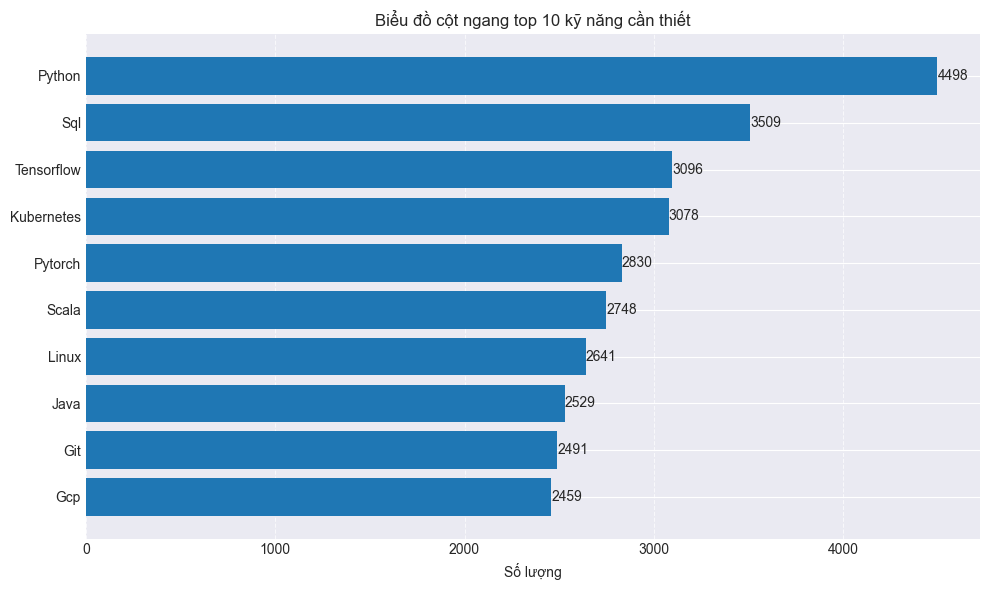

In [13]:

frequency = skill_df['required_skills'].value_counts().head(10)

# Chu·∫©n b·ªã d·ªØ li·ªáu cho bi·ªÉu ƒë·ªì
categories = frequency.index.tolist() # L·∫•y c√°c t√™n danh m·ª•c t·ª´ index c·ªßa Series
values = frequency.values.tolist()    # L·∫•y c√°c gi√° tr·ªã t·∫ßn su·∫•t

# --- Ph·∫ßn v·∫Ω bi·ªÉu ƒë·ªì c·ªôt ngang (t∆∞∆°ng t·ª± nh∆∞ v√≠ d·ª• tr∆∞·ªõc) ---
fig, ax = plt.subplots(figsize=(10, 6))

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt ngang
bars = ax.barh(np.arange(len(categories)), values)

# ƒê·∫∑t nh√£n cho tr·ª•c y (c√°c c·ªôt ch·ªØ)
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# ƒê·∫£o ng∆∞·ª£c tr·ª•c y ƒë·ªÉ c·ªôt ƒë·∫ßu ti√™n hi·ªÉn th·ªã ·ªü tr√™n c√πng
ax.invert_yaxis()

# Th√™m nh√£n gi√° tr·ªã v√†o cu·ªëi m·ªói c·ªôt
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width}',
            ha='left', va='center')

# ƒê·∫∑t ti√™u ƒë·ªÅ v√† nh√£n tr·ª•c
ax.set_xlabel('S·ªë l∆∞·ª£ng')
ax.set_title('Bi·ªÉu ƒë·ªì c·ªôt ngang top 10 k·ªπ nƒÉng c·∫ßn thi·∫øt')

# Hi·ªÉn th·ªã l∆∞·ªõi
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Insight**: Python v·∫´n lu√¥n l√† k·ªπ nƒÉng quan tr·ªçng trong ngh√†nh khoa h·ªçc d·ªØ li·ªáu n√≥i chung v√† l·∫≠p tr√¨nh n√≥i ri√™ng. B√™n c·∫°nh ƒë√≥, SQL c≈©ng quan tr·ªçng kh√¥ng k√©m. Tensorflow c≈©ng n·ªïi tr·ªôi tuy nhi√™n ch·ªâ ph√π h·ª£p v·ªõi c√°c v·ªã tr√≠ nh∆∞ ML, AI, ...

## **Dashboard 1: T·ªïng quan to√†n c·∫£nh th·ªã tr∆∞·ªùng**

### **Dashboard d√†nh cho**: c√°c nh√† qu·∫£n l√Ω, l√£nh ƒë·∫°o
### **C√¢u h·ªèi**: c√°c nh√† qu·∫£n l√Ω, l√£nh ƒë·∫°o quan t√¢m ƒë·∫øn ƒëi·ªÅu g√¨ ?
#### 1. Ph√¢n T√≠ch C·∫°nh Tranh v·ªÅ L∆∞∆°ng Th∆∞·ªüng (Compensation & Competitive Analysis)

**C√¢u h·ªèi kinh doanh**:
+ Ch√∫ng ta ƒëang tr·∫£ l∆∞∆°ng c√≥ c·∫°nh tranh kh√¥ng?
+ Ch√∫ng ta n√™n ƒë·∫∑t ng√¢n s√°ch l∆∞∆°ng th∆∞·ªüng nh∆∞ th·∫ø n√†o cho c√°c v·ªã tr√≠ v√† th·ªã tr∆∞·ªùng kh√°c nhau?

#### 2. Ho·∫°ch ƒê·ªãnh K·ªπ NƒÉng v√† Ngu·ªìn L·ª±c (Skills & Workforce Planning)

**C√¢u h·ªèi kinh doanh**:
+ Ch√∫ng ta c·∫ßn t·∫≠p trung v√† ƒë√†o t·∫°o nh·ªØng k·ªπ nƒÉng n√†o cho nh√¢n vi√™n ?
+ Ph√∫c l·ª£i t∆∞∆°ng ·ª©ng ƒë·ªëi v·ªõi t·ª´ng v·ªã tr√≠ cho nh√¢n vi√™n ?

#### 3. Ph√¢n T√≠ch M√¥ H√¨nh L√†m Vi·ªác v√† ƒê·ªãa L√Ω (Work Model & Geo Analysis)

**C√¢u h·ªèi kinh doanh**:
+ M·ªè v√†ng nh√¢n t√†i ƒëang n·∫±m ·ªü ƒë√¢u ?
+ C√≥ n√™n m·ªü r·ªông m√¥ h√¨nh l√†m vi·ªác c·ªßa c√¥ng ty ?

### **1. Ph√¢n t√≠ch c·∫°nh tranh v·ªÅ l∆∞∆°ng th∆∞·ªüng**

#### ƒê·∫ßu ti√™n, t√¥i c·∫ßn x√°c ƒë·ªãnh xem c√°i v·∫•n ƒë·ªÅ ·ªü tr√™n c·ªßa t√¥i: c√≥ ƒë√∫ng l√† nƒÉm kinh nghi·ªám c√≥ m·ªëi quan h·ªá v·ªõi experience level kh√¥ng

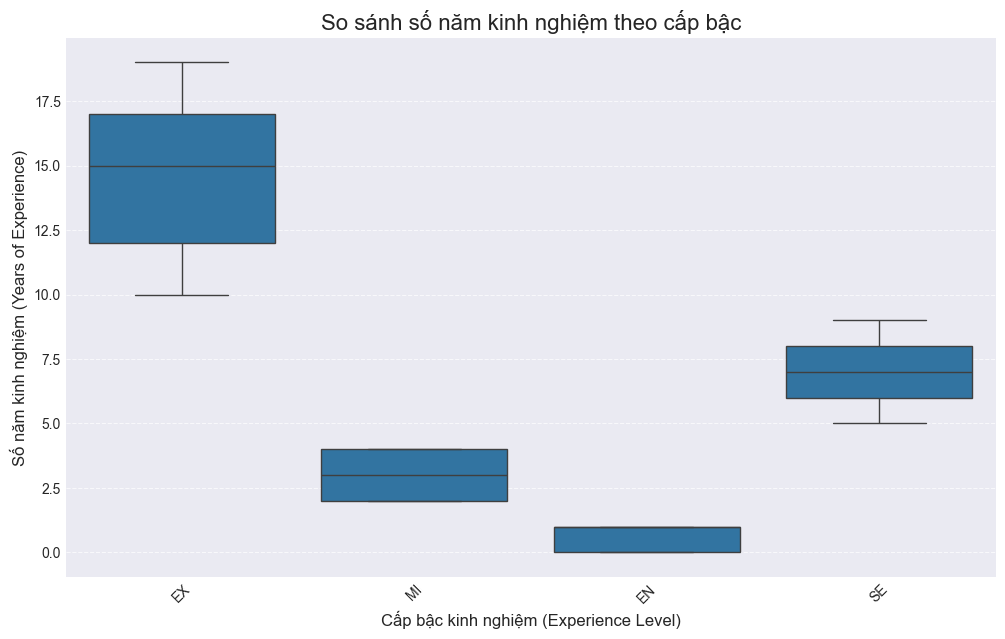

In [14]:

plt.figure(figsize=(12, 7))
# Thay b·∫±ng sns.violinplot
sns.boxplot(x='experience_level', y='years_experience', data=df)

plt.title('So s√°nh s·ªë nƒÉm kinh nghi·ªám theo c·∫•p b·∫≠c', fontsize=16)
plt.xlabel('C·∫•p b·∫≠c kinh nghi·ªám (Experience Level)', fontsize=12)
plt.ylabel('S·ªë nƒÉm kinh nghi·ªám (Years of Experience)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Nh∆∞ ta th·∫•y ·ªü ƒë√¢y**:
1. M·ª©c ƒë·ªô entry (E): th∆∞·ªùng n·∫±m ·ªü m·ª©c kinh nghi·ªám l√† t·ª´ 0 ƒë·∫øn 1 (ho·∫∑c 2)
2. M·ª©c ƒë·ªô trung c·∫•p (M): C√≥ s·ªë nƒÉm kinh nghi·ªám kho·∫£ng t·ª´ 2.5 ƒë·∫øn 4 (ho·∫∑c 5)
3. M·ª©c ƒë·ªô cao c·∫•p (SE): c√≥ s√≥ nƒÉm kinh nghi·ªám trong kho·∫£ng t·ª´ 6 ƒë·∫øn 8 nƒÉm (c√≥ m·ªôt s·ªë ngo·∫°i l·ªá n·∫±m trong kho·∫£ng t·ª´ 5 ƒë·∫øn 9)
4. M·ª©c ƒë·ªô cao c·∫•p (EX): c√≥ s·ªë nƒÉm kinh nghi·ªám r∆°i v√†o t·ª´ 10+

**ƒêi·ªÅu ƒë√≥ c√≥ √Ω nghƒ©a g√¨ ?**
1. Vi·ªác x√°c ƒë·ªãnh m·ªëi quan h·ªá gi·ªØa s·ªë nƒÉm kinh nghi·ªám v√† tr√¨nh ƒë·ªô t∆∞∆°ng ·ª©ng c√≥ th·ªÉ gi√∫p cho doanh nghi·ªáp x√°c ƒë·ªãnh ƒë∆∞·ª£c m·ª©c ƒë·ªô ph√π h·ª£p cho ·ª©ng vi√™n. T·ª´ ƒë√≥ c√≥ th·ªÉ ch·ªçn ƒë∆∞·ª£c ch√≠nh s√°ch l∆∞∆°ng th∆∞·ªüng cho ƒë√∫ng ƒë·∫Øn
2. Vi·ªác x√°c ƒë·ªãnh r√µ m·ªëi quan h·ªá n√†y c≈©ng gi√∫p cho doanh nghi·ªáp d·ªÖ d√†ng ƒë√°nh gi√° ng∆∞·ªùi lao ƒë·ªông v√† x·∫øp h·∫°ng cho h·ªç t∆∞∆°ng ·ª©ng. ƒê·ªìng th·ªùi c√≥ nh·ªØng ch√≠nh s√°ch ƒë√£i ng·ªô c≈©ng nh∆∞ l√† ch√≠nh s√°ch training ph√π h·ª£p cho t·ª´ng v·ªã tr√≠ kinh nghi·ªám l√†m vi·ªác

#### Ti·∫øp theo, t√¥i quan t√¢m ƒë·∫øn s·ªë ti·ªÅn l∆∞∆°ng trung b√¨nh cho t·ª´ng v·ªã tr√≠ l√† nh∆∞ th·∫ø n√†o ?

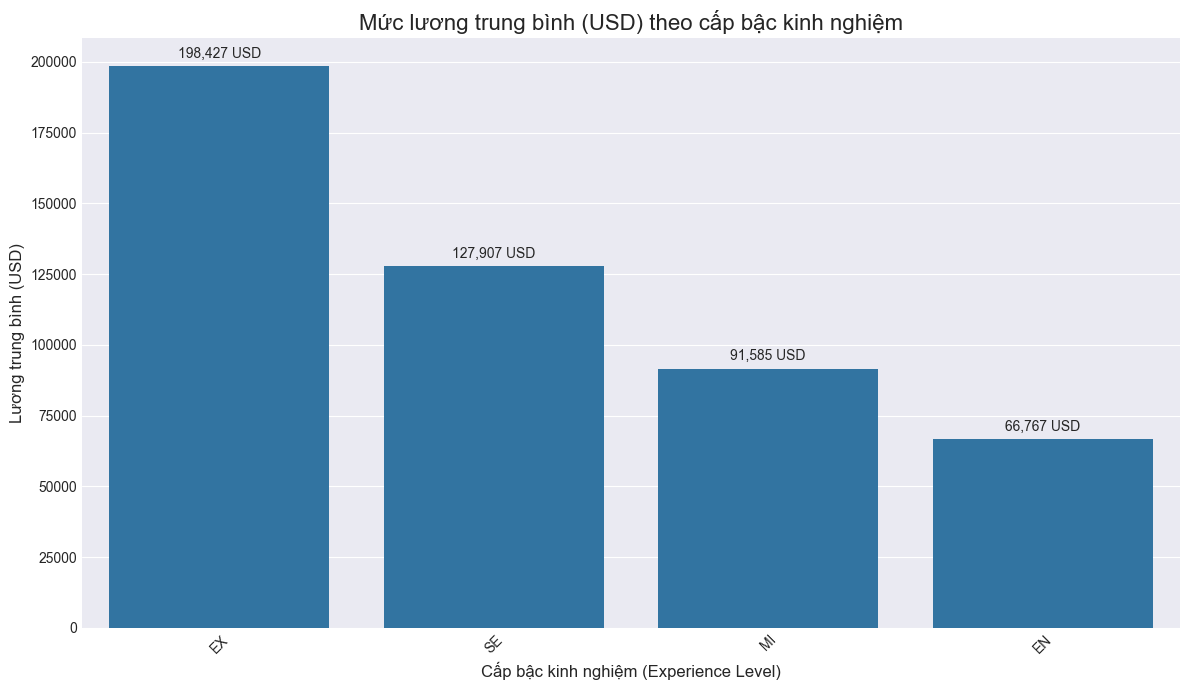

In [15]:
avg_salary_each_exp = df.groupby('experience_level')['salary_usd'].mean().sort_values(ascending=False)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(12, 7))
barplot = sns.barplot(x=avg_salary_each_exp.index, y=avg_salary_each_exp.values)

# Th√™m nh√£n gi√° tr·ªã tr√™n m·ªói c·ªôt ƒë·ªÉ d·ªÖ ƒë·ªçc
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ',.0f') + ' USD', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# ƒê·∫∑t ti√™u ƒë·ªÅ v√† nh√£n
plt.title('M·ª©c l∆∞∆°ng trung b√¨nh (USD) theo c·∫•p b·∫≠c kinh nghi·ªám', fontsize=16)
plt.xlabel('C·∫•p b·∫≠c kinh nghi·ªám (Experience Level)', fontsize=12)
plt.ylabel('L∆∞∆°ng trung b√¨nh (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout() # T·ª± ƒë·ªông ƒëi·ªÅu ch·ªânh cho v·ª´a v·∫∑n
plt.show()

**Ta c√≥ nh·∫≠n x√©t sau**:

M·ª©c ƒë·ªô tƒÉng tr∆∞·ªüng l∆∞∆°ng r·∫•t cao qua c√°c c·∫•p b·∫≠c: t·ª´ v·ªã tr√≠ EN ƒë·∫øn EX, l∆∞∆°ng trung b√¨nh tƒÉng g·∫ßn 3x (t·ª´ $63K l√™n $188K). ƒê·ªÉ d·ªÖ h√¨nh dung, n·∫øu kinh nghi·ªám c·ªßa b·∫°n t√≠ch l≈©y ƒë∆∞·ª£c th√™m 9 nƒÉm, s·ªë ti·ªÅn c·ªßa b·∫°n t∆∞∆°ng ·ª©ng t√¢ng l√™n 3 l·∫ßn. Tuy nhi√™n, c≈©ng c·∫ßn l∆∞u √Ω r·∫±ng s·ªë nƒÉm kinh nghi·ªám kh√¥ng ƒë·∫£m b·∫£o ho√†n to√†n r·∫±ng vi·ªác b·∫°n c√≥ th·ªÉ ƒë∆∞·ª£c tƒÉng l∆∞∆°ng nh∆∞ v·∫≠y v√¨ n√≥ c√≤n ph·ª• thu·ªôc nhi·ªÅu v√†o c√°c y·∫øu t·ªë kh√°c n·ªØa nh∆∞: k·ªπ nƒÉng, hi·ªáu su·∫•t, ...  

**D·ª±a v√†o bi·ªÉu ƒë·ªì tr√™n, c√°c nh√† qu·∫£n l√Ω c√≥ th·ªÉ"**
+ Cho nh√¢n vi√™n th·∫•y ƒë∆∞·ª£c potential growth, t·∫°o ƒë·ªông l·ª±c cho nh√¢n vi√™n
+ X√°c ƒë·ªãnh ƒë∆∞·ª£c kho·∫£ng l∆∞∆°ng c·ª• th·ªÉ cho t·ª´ng v·ªã tr√≠
+ D·ªÖ d√†ng t√¨m ki·∫øm c√°c ·ª©ng vi√™n ph√π h·ª£p d·ª±a v√†o t√¨nh h√¨nh t√†i ch√≠nh c·ªßa c√¥ng ty


#### Vi·ªác d·ª±a v√†o v·ªã tr√≠ ƒë·ªÉ x√°c ƒë·ªãnh m·ªói l∆∞∆°ng th∆∞·ªüng n√≥i chung l√† ch∆∞a ƒë·ªß, c√≥ l·∫Ω ƒë·ªÉ h·ª£p l√Ω h∆°n. Ta c·∫ßn chia theo c·∫£ lo·∫°i h√¨nh c√¥ng vi·ªác, quy m√¥ c√¥ng ty v√† theo qu·ªëc gia

**C√¥ng vi·ªác n√†y s·∫Ω ƒë∆∞·ª£c th·ª±c hi·ªán ·ªü tr√™n power bi**

### **2. Ho·∫°ch ƒê·ªãnh K·ªπ NƒÉng v√† Ngu·ªìn L·ª±c**

Nh∆∞ t√¥i ƒë√£ ph√¢n t√≠ch t·ªïng quan tr∆∞·ªõc ƒë√≥ th√¨ c√°c k·ªπ nƒÉng ƒë∆∞·ª£c c√°c nh√† tuy·ªÉn d·ª•ng t√¨m ki·∫øm h√†ng nhi·ªÅu nh·∫•t ·ªü v·ªã tr√≠ hi·ªán t·∫°i ƒëang l√† Python. Ti·∫øp theo ƒë√≥ l√† SQL, Tensorflow, .... B√¢y gi·ªù, ta c√πng ph√¢n t√≠ch k·ªπ h∆°n ch√∫t

#### Gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ 1: Ta c·∫ßn t·∫≠p trung nh·ªØng k·ªπ nƒÉng n√†o cho nh√¢n vi√™n ?

ƒê·∫ßu ti√™n ta c·∫ßn ph√¢n r√£ t·ª´ng ngh√†nh t∆∞∆°ng ·ª©ng (trong power bi ta s·∫Ω d√πng b·ªô l·ªçc)

In [16]:
all_table =  new_df.merge(skill_df,left_on='job_id',right_on='job_id',how='inner')

In [17]:

job_titles = sorted(all_table['job_title'].unique())

# --- B∆Ø·ªöC 2: T·∫†O H√ÄM ƒê·ªÇ V·∫º BI·ªÇU ƒê·ªí CHO M·ªòT NG√ÄNH NGH·ªÄ DUY NH·∫§T ---
# H√†m n√†y s·∫Ω ƒë∆∞·ª£c g·ªçi m·ªói khi b·∫°n thay ƒë·ªïi l·ª±a ch·ªçn trong dropdown
def plot_skills_for_job(job_title):
    # L·ªçc d·ªØ li·ªáu cho ng√†nh ngh·ªÅ ƒë∆∞·ª£c ch·ªçn
    job_skills = all_table[all_table['job_title'] == job_title]
    
    # ƒê·∫øm top 10 k·ªπ nƒÉng
    top_10_skills = job_skills['required_skills'].value_counts().nlargest(10)
    
    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(10, 7))
    sns.barplot(x=top_10_skills.values, y=top_10_skills.index)
    
    # Tinh ch·ªânh bi·ªÉu ƒë·ªì
    plt.title(f'Top 10 K·ªπ nƒÉng Quan tr·ªçng cho: {job_title}', fontsize=16)
    plt.xlabel('S·ªë l∆∞·ª£ng y√™u c·∫ßu', fontsize=12)
    plt.ylabel('K·ªπ nƒÉng', fontsize=12)
    plt.tight_layout()
    plt.show()

# --- B∆Ø·ªöC 3: T·∫†O V√Ä HI·ªÇN TH·ªä B·ªò L·ªåC T∆Ø∆†NG T√ÅC ---
# widgets.interactive s·∫Ω k·∫øt n·ªëi h√†m plot_skills_for_job v·ªõi dropdown
# M·ªói gi√° tr·ªã trong dropdown s·∫Ω ƒë∆∞·ª£c truy·ªÅn v√†o tham s·ªë 'job_title' c·ªßa h√†m
interactive_plot = widgets.interactive(
    plot_skills_for_job, 
    job_title=widgets.Dropdown(options=job_titles, description='Ch·ªçn Ng√†nh:')
)

# Hi·ªÉn th·ªã b·ªô l·ªçc v√† khu v·ª±c bi·ªÉu ƒë·ªì
display(interactive_plot)

interactive(children=(Dropdown(description='Ch·ªçn Ng√†nh:', options=('AI Architect', 'AI Consultant', 'AI Produc‚Ä¶

Ch∆∞a d·ª´ng l·∫°i ·ªü ƒë√≥, ta s·∫Ω t√¨m b·ªô k·ªπ nƒÉng "v√†ng": top 10 k·ªπ nƒÉng ƒë∆∞·ª£c tr·∫£ l∆∞∆°ng cao nh·∫•t

In [18]:
skill_salary_analysis = all_table.groupby('required_skills')['salary_usd'].agg(['mean', 'median', 'count'])
skill_salary_analysis = skill_salary_analysis.sort_values(by='mean', ascending=False)

# L·ªçc ra nh·ªØng k·ªπ nƒÉng c√≥ 'count' l·ªõn h∆°n ho·∫∑c b·∫±ng ng∆∞·ª°ng
significant_skills = skill_salary_analysis[skill_salary_analysis['count'] >= 5]

# S·∫Øp x·∫øp l·∫°i sau khi ƒë√£ l·ªçc
top_paying_skills = significant_skills.sort_values(by='mean', ascending=False)

# L√†m cho b·∫£ng tr√¥ng ƒë·∫πp h∆°n
styled_table = top_paying_skills.head(10).style.format({
    'mean': '${:,.0f}',
    'median': '${:,.0f}'
}).set_caption('Top 10 K·ªπ nƒÉng ƒë∆∞·ª£c tr·∫£ l∆∞∆°ng cao nh·∫•t (USD)')

display(styled_table)


**D·ª±a v√†o c√°c bi·ªÉu ƒë·ªì tr√™n, c√°c nh√† qu·∫£n l√Ω l√£nh ƒë·∫°o c√≥ th·ªÉ**:
- L√™n ph∆∞∆°ng √°n ƒë√†o t·∫°o cho nh√¢n vi√™n
- N·∫Øm b·∫Øt ƒë∆∞·ª£c xu h∆∞·ªõng c·ªßa th·ªã tr∆∞·ªùng (ph√°t tri·ªÉn theo h∆∞·ªõng c√¥ng ngh·ªá/ t·ª± ƒë·ªông h√≥a/ ...)

#### Gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ 2: Ph√∫c l·ª£i t∆∞∆°ng ·ª©ng ƒë·ªëi v·ªõi t·ª´ng v·ªã tr√≠

In [19]:
def get_options_with_all(column_name):
    """H√†m helper ƒë·ªÉ l·∫•y c√°c gi√° tr·ªã duy nh·∫•t v√† th√™m 'T·∫•t c·∫£' v√†o ƒë·∫ßu"""
    options = ['T·∫•t c·∫£'] + sorted(new_df[column_name].unique().tolist())
    return options

# T·∫°o c√°c dropdown widget
industry_widget = widgets.Dropdown(options=get_options_with_all('industry'), description='Ng√†nh:')
job_category_widget = widgets.Dropdown(options=get_options_with_all('job_title'), description='Lo·∫°i CV:')
experience_level_widget = widgets.Dropdown(options=get_options_with_all('experience_level'), description='C·∫•p b·∫≠c:')


def display_benefit_score_card(industry, job_category, experience_level):
    
    # L·ªçc DataFrame d·ª±a tr√™n l·ª±a ch·ªçn t·ª´ widgets
    filtered_df = new_df.copy()
    
    if industry != 'T·∫•t c·∫£':
        filtered_df = filtered_df[filtered_df['industry'] == industry]
        
    if job_category != 'T·∫•t c·∫£':
        filtered_df = filtered_df[filtered_df['job_title'] == job_category]
        
    if experience_level != 'T·∫•t c·∫£':
        filtered_df = filtered_df[filtered_df['experience_level'] == experience_level]
        
    # T√≠nh to√°n ƒëi·ªÉm trung b√¨nh
    if not filtered_df.empty:
        avg_score = filtered_df['benefits_score'].mean()
        score_text = f"{avg_score:.2f}"
        num_jobs = len(filtered_df)
        footer_text = f"D·ª±a tr√™n {num_jobs} tin tuy·ªÉn d·ª•ng"
    else:
        score_text = "N/A" # Kh√¥ng c√≥ d·ªØ li·ªáu
        footer_text = "Kh√¥ng c√≥ d·ªØ li·ªáu ph√π h·ª£p"
        
    # V·∫Ω card b·∫±ng matplotlib
    fig, ax = plt.subplots(figsize=(4, 2))
    fig.patch.set_facecolor('#f0f0f0') # M√†u n·ªÅn cho card
    
    # Hi·ªÉn th·ªã gi√° tr·ªã ch√≠nh
    ax.text(0.5, 0.6, score_text, 
            ha='center', va='center', 
            fontsize=40, fontweight='bold', color='#007acc')
    
    # Hi·ªÉn th·ªã ti√™u ƒë·ªÅ
    ax.text(0.5, 0.9, 'ƒêi·ªÉm Ph√∫c l·ª£i Trung b√¨nh', 
            ha='center', va='center', 
            fontsize=14)

    # Hi·ªÉn th·ªã footer
    ax.text(0.5, 0.1, footer_text, 
            ha='center', va='center', 
            fontsize=10, color='grey')
            
    # ·∫®n c√°c tr·ª•c
    ax.axis('off')
    plt.show()


# widgets.interactive s·∫Ω theo d√µi s·ª± thay ƒë·ªïi c·ªßa c√°c widget
interactive_card = widgets.interactive(
    display_benefit_score_card,
    industry=industry_widget,
    job_category=job_category_widget,
    experience_level=experience_level_widget
)

# Hi·ªÉn th·ªã c√°c b·ªô l·ªçc v√† khu v·ª±c card
display(interactive_card)

interactive(children=(Dropdown(description='Ng√†nh:', options=('T·∫•t c·∫£', 'Automotive', 'Consulting', 'Education‚Ä¶

**D·ª±a v√†o card tr√™n, c√°c nh√† qu·∫£n l√Ω c√≥ th·ªÉ:**
- Thay ƒë·ªïi c√°c ch√≠nh s√°ch ƒë√£i ng·ªô c·ªßa c√¥ng ty ƒë·ªÉ t√¨m ki·∫øm c√°c nh√¢n t√†i: tƒÉng l∆∞∆°ng th∆∞·ªüng, t·ªï ch·ª©c nhi·ªÅu ho·∫°t ƒë·ªông vui ch∆°i h√†ng th√°ng/qu√Ω h∆°n,...
- T·∫°o th·∫ø c·∫°nh tranh cho c√¥ng ty tr√™n th·ªã tr∆∞·ªùng lao ƒë·ªông

### **3. Ph√¢n t√≠ch m√¥ h√¨nh l√†m vi·ªác v√† ƒë·ªãa l√Ω**

#### Gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ 1: M·ªè v√†ng nh√¢n t√†i n·∫±m ·ªü ƒë√¢u ?

1. ƒê·∫øm s·ªë l∆∞·ª£ng tuy·ªÉn d·ª•ng nh√¢n vi√™n trong ngh√†nh AI/Data theo employee_residence

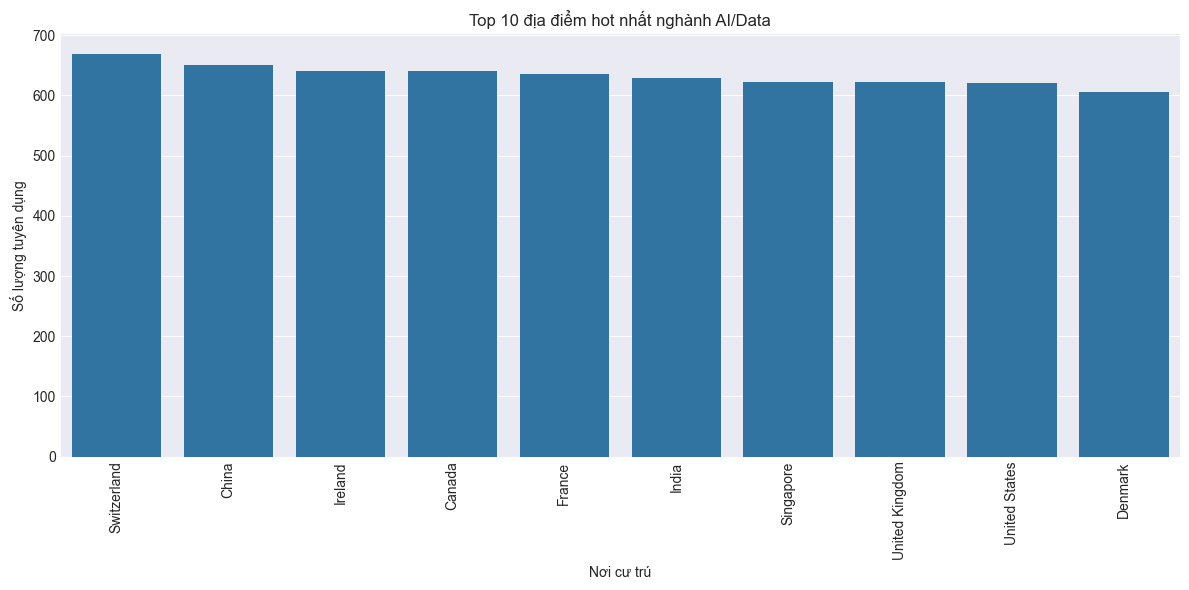

In [20]:
plt.figure(figsize=(12, 6)) # T√πy ch·ªânh k√≠ch th∆∞·ªõc bi·ªÉu ƒë·ªì cho d·ªÖ nh√¨n
sns.countplot(x='employee_residence', data=new_df, order=new_df['employee_residence'].value_counts().sort_values(ascending=False).index[:10])
plt.title('Top 10 ƒë·ªãa ƒëi·ªÉm hot nh·∫•t ngh√†nh AI/Data')
plt.xlabel('N∆°i c∆∞ tr√∫')
plt.ylabel('S·ªë l∆∞·ª£ng tuy√™n d·ª•ng')
plt.xticks(rotation=90) # Xoay nh√£n tr·ª•c x n·∫øu c√≥ nhi·ªÅu qu·ªëc gia
plt.tight_layout() # ƒêi·ªÅu ch·ªânh b·ªë c·ª•c ƒë·ªÉ tr√°nh nh√£n b·ªã c·∫Øt
plt.show()

**Bi·ªÉu ƒë·ªì tr√™n gi√∫p c√°c nh√† qu·∫£n l√Ω**: Bi·∫øt ƒë√¢u l√† "ƒëi·ªÉm n√≥ng AI", xem x√©t c∆° h·ªôi c·∫°nh tranh (n·∫øu c√≥)


2. Ph√¢n t√≠ch ƒëi·ªÉm n√≥ng v√† chi ph√≠ t∆∞∆°ng ·ª©ng ph·∫£i chi tr·∫£

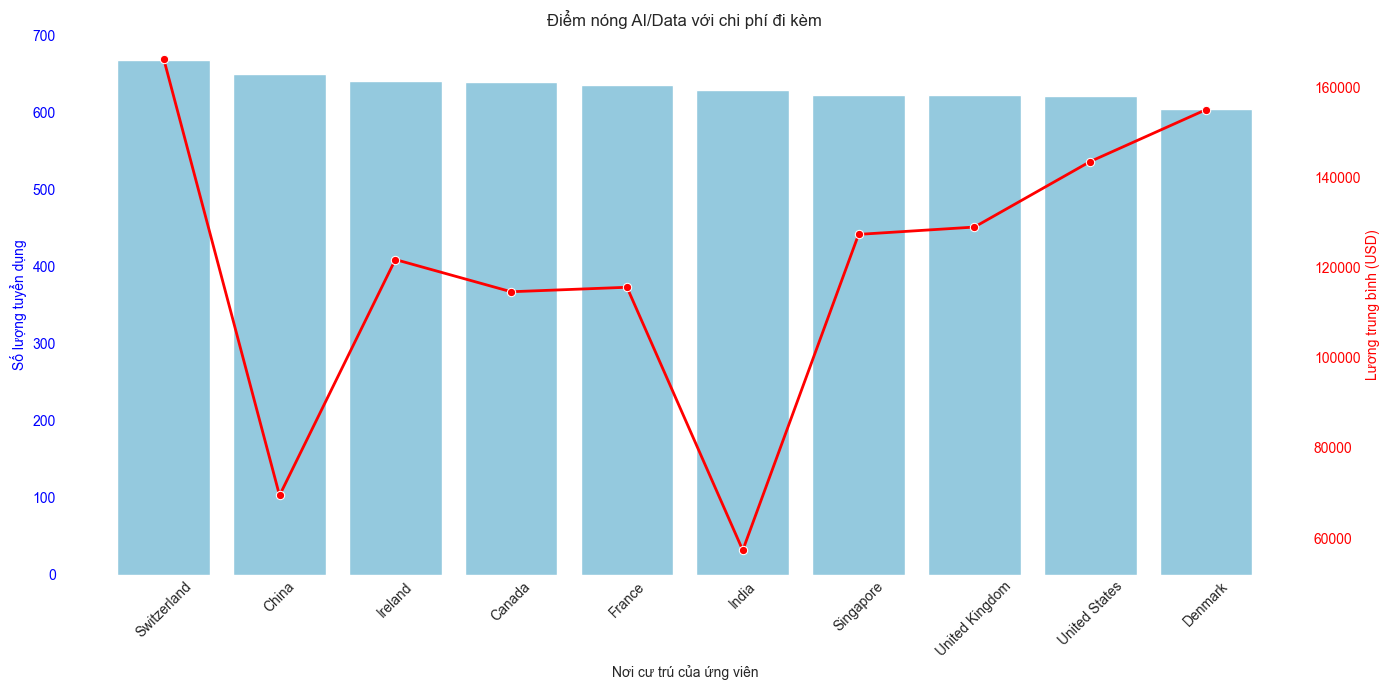

In [21]:

# Thi·∫øt l·∫≠p ki·ªÉu bi·ªÉu ƒë·ªì Seaborn th√†nh 'white' ƒë·ªÉ lo·∫°i b·ªè n·ªÅn v√† ƒë∆∞·ªùng l∆∞·ªõi
sns.set_style('white')

value_analysis = new_df.groupby('employee_residence')['salary_usd'].agg(['count', 'mean']).round(0)
# L·ªçc ra nh·ªØng n∆°i c√≥ √≠t nh·∫•t 5 nh√¢n t√†i ƒë·ªÉ k·∫øt qu·∫£ ƒë√°ng tin c·∫≠y
value_analysis_significant = value_analysis[value_analysis['count'] >= 5]
# S·∫Øp x·∫øp DataFrame ƒë·ªÉ bi·ªÉu ƒë·ªì d·ªÖ ƒë·ªçc h∆°n (l·∫•y top 10 theo count)
value_analysis_significant_sorted = value_analysis_significant.sort_values(by='count', ascending=False).head(10)

# T·∫°o figure v√† tr·ª•c ch√≠nh (ax1) cho bi·ªÉu ƒë·ªì c·ªôt
fig, ax1 = plt.subplots(figsize=(14, 7))

# V·∫Ω bi·ªÉu ƒë·ªì c·ªôt cho s·ªë l∆∞·ª£ng (count) v·ªõi m√†u ƒë∆°n gi·∫£n
sns.barplot(x='employee_residence', y='count', data=value_analysis_significant_sorted, ax=ax1, color='skyblue')
ax1.set_xlabel('N∆°i c∆∞ tr√∫ c·ªßa ·ª©ng vi√™n')
ax1.set_ylabel('S·ªë l∆∞·ª£ng tuy·ªÉn d·ª•ng', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('ƒêi·ªÉm n√≥ng AI/Data v·ªõi chi ph√≠ ƒëi k√®m')
ax1.tick_params(axis='x', rotation=45) # Xoay nh√£n tr·ª•c x ƒë·ªÉ tr√°nh ch·ªìng ch√©o

# T·∫°o tr·ª•c y th·ª© hai (ax2) chia s·∫ª tr·ª•c x v·ªõi ax1
ax2 = ax1.twinx()

# V·∫Ω bi·ªÉu ƒë·ªì ƒë∆∞·ªùng cho l∆∞∆°ng trung b√¨nh (mean)
sns.lineplot(x='employee_residence', y='mean', data=value_analysis_significant_sorted, ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('L∆∞∆°ng trung b√¨nh (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.ticklabel_format(style='plain', axis='y') # Lo·∫°i b·ªè k√Ω hi·ªáu khoa h·ªçc n·∫øu c√≥

# ƒêi·ªÅu ch·ªânh b·ªë c·ª•c v√† hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


**·ªû ƒë√¢y ta th·∫•y**
- China/India l√† m·ªôt trong nh·ªØng ƒëi·ªÉm n√≥ng c√¥ng ngh·ªá tr√™n th·∫ø gi·ªõi. M√† h∆°n n·ªØa, chi ph√≠ nh∆∞ ta th·∫•y l√† th·∫•p nh·∫•t -> Th·∫ø n√™n nh√† l√£nh ƒë·∫°o c√≥ th·ªÉ t·∫≠p trung v√†o th·ªã tr∆∞·ªùng n√†y. M·ªôt l·ª±a ch·ªçn kh√°c l√† ·ªü th·ªã tr∆∞·ªùng ·∫•n ƒë·ªô

3. C√°c chuy√™n gia ƒë·∫ßu ngh√†nh h·ªç ·ªü ƒë√¢u ?

In [22]:
exp_filter = sorted(new_df['experience_level'].unique())

def my_plot(exp_input):
    # ƒê·∫£m b·∫£o exp_input l√† m·ªôt list ho·∫∑c tuple, ngay c·∫£ khi ch·ªâ ch·ªçn m·ªôt gi√° tr·ªã
    # SelectMultiple lu√¥n tr·∫£ v·ªÅ m·ªôt tuple, nh∆∞ng ki·ªÉm tra n√†y an to√†n h∆°n
    if not isinstance(exp_input, (list, tuple)):
        exp_input = [exp_input]

    # L·ªçc DataFrame d·ª±a tr√™n nhi·ªÅu c·∫•p ƒë·ªô kinh nghi·ªám ƒë∆∞·ª£c ch·ªçn
    # S·ª≠ d·ª•ng .isin() ƒë·ªÉ ki·ªÉm tra xem gi√° tr·ªã c√≥ n·∫±m trong list c√°c l·ª±a ch·ªçn kh√¥ng
    df_temp = new_df[new_df['experience_level'].isin(exp_input)].copy()

    plt.figure(figsize=(12, 6))

    if not df_temp.empty:
        # L·∫•y top 10 ƒë·ªãa ƒëi·ªÉm hot nh·∫•t theo s·ªë l∆∞·ª£ng nh√¢n vi√™n
        # S·∫Øp x·∫øp l·∫°i theo s·ªë l∆∞·ª£ng gi·∫£m d·∫ßn
        top_10_locations = df_temp['employee_residence'].value_counts().sort_values(ascending=False).index[:10]
        sns.countplot(x='employee_residence', data=df_temp, order=top_10_locations, color='skyblue')
        # Ti√™u ƒë·ªÅ bi·ªÉu ƒë·ªì ƒë·ªông, hi·ªÉn th·ªã c√°c c·∫•p ƒë·ªô kinh nghi·ªám ƒë√£ ch·ªçn
        # Chuy·ªÉn ƒë·ªïi tuple/list exp_input th√†nh chu·ªói ƒë·ªÉ hi·ªÉn th·ªã
        title_exp = ', '.join(exp_input) if exp_input else 'T·∫•t c·∫£'
        plt.title(f'Top 10 ƒë·ªãa ƒëi·ªÉm hot nh·∫•t ng√†nh AI/Data cho c·∫•p ƒë·ªô kinh nghi·ªám: {title_exp}')
        plt.xlabel('N∆°i c∆∞ tr√∫')
        plt.ylabel('S·ªë l∆∞·ª£ng nh√¢n vi√™n')
        plt.xticks(rotation=90) # Xoay nh√£n tr·ª•c x ƒë·ªÉ d·ªÖ ƒë·ªçc
        plt.tight_layout() # ƒêi·ªÅu ch·ªânh b·ªë c·ª•c ƒë·ªÉ tr√°nh nh√£n b·ªã c·∫Øt
    else:
        # Hi·ªÉn th·ªã th√¥ng b√°o n·∫øu kh√¥ng c√≥ d·ªØ li·ªáu cho c√°c c·∫•p ƒë·ªô kinh nghi·ªám n√†y
        plt.text(0.5, 0.5, 'Kh√¥ng c√≥ d·ªØ li·ªáu cho c√°c c·∫•p ƒë·ªô kinh nghi·ªám n√†y',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14, color='red')
        title_exp = ', '.join(exp_input) if exp_input else 'T·∫•t c·∫£'
        plt.title(f'Kh√¥ng c√≥ d·ªØ li·ªáu cho c·∫•p ƒë·ªô kinh nghi·ªám: {title_exp}')
        plt.axis('off') # T·∫Øt tr·ª•c n·∫øu kh√¥ng c√≥ d·ªØ li·ªáu


# T·∫°o interactive widget v·ªõi SelectMultiple ƒë·ªÉ l·ª±a ch·ªçn nhi·ªÅu gi√° tr·ªã
interactive_plot = widgets.interactive(
    my_plot,
    exp_input = widgets.SelectMultiple(
        options=exp_filter,
        # ƒê·∫∑t gi√° tr·ªã m·∫∑c ƒë·ªãnh. Ch·ªçn ph·∫ßn t·ª≠ ƒë·∫ßu ti√™n n·∫øu exp_filter kh√¥ng r·ªóng.
        value=[exp_filter[0]] if exp_filter else [],
        description='C·∫•p ƒë·ªô kinh nghi·ªám:',
        disabled=False
    )
)

display(interactive_plot)


interactive(children=(SelectMultiple(description='C·∫•p ƒë·ªô kinh nghi·ªám:', index=(0,), options=('EN', 'EX', 'MI',‚Ä¶

**C√¥ng d·ª•ng bi·ªÉu ƒë·ªì**: T√¨m ki·∫øm ƒë∆∞·ª£c nh·ªØng th·ªã tr∆∞·ªùng gi√†u kinh nghi·ªám, k·ªπ nƒÉng v√† ƒë√°p ·ª©ng nhu c·∫ßu ri√™ng c·ªßa doanh nghi·ªáp

#### Gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ 2: C√≥ n√™n m·ªü r·ªông m√¥ h√¨nh l√†m vi·ªác c·ªßa c√¥ng ty ?

S·ªë l∆∞·ª£ng tuy·ªÉn d·ª•ng v·ªõi t·ª´ng m√¥ h√¨nh x√©t theo m√¥ h√¨nh doanh nghi·ªáp, ngh√†nh

In [23]:
sns.set_style("whitegrid")          

company_sizes = ['T·∫•t c·∫£'] + df['company_size'].unique().tolist()
industries    = ['T·∫•t c·∫£'] + df['industry'].unique().tolist()

def plot_remote_ratio_count(company_size, industry):
    d = df.copy()
    if company_size != 'T·∫•t c·∫£':
        d = d[d['company_size'] == company_size]
    if industry != 'T·∫•t c·∫£':
        d = d[d['industry'] == industry]

    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=d, x='remote_ratio',
                       order=[0, 50, 100],
                       color='steelblue')         

    ax.set_title('Ph√¢n b·ªë m√¥ h√¨nh l√†m vi·ªác', fontsize=14, pad=15)
    ax.set_xlabel('T·ª∑ l·ªá l√†m vi·ªác t·ª´ xa (%)')
    ax.set_ylabel('S·ªë tin tuy·ªÉn d·ª•ng')
    ax.set_xticklabels(['On-site', 'Hybrid', 'Remote'])

    for p in ax.patches:                           
        h = p.get_height()
        ax.annotate(f'{h}', (p.get_x()+p.get_width()/2, h),
                    ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

company_size_widget = widgets.Dropdown(options=company_sizes, value='T·∫•t c·∫£', description='Company size')
industry_widget     = widgets.Dropdown(options=industries,    value='T·∫•t c·∫£', description='Industry')

display(widgets.interactive(plot_remote_ratio_count,
                            company_size=company_size_widget,
                            industry=industry_widget))

interactive(children=(Dropdown(description='Company size', options=('T·∫•t c·∫£', 'M', 'L', 'S'), value='T·∫•t c·∫£'),‚Ä¶

Chi ph√≠ trung b√¨nh cho t·ª´ng lo·∫°i h√¨nh l√† nh∆∞ n√†o ?

In [24]:
# L·∫•y c√°c gi√° tr·ªã duy nh·∫•t cho c√°c b·ªô l·ªçc
# ƒê·∫£m b·∫£o c√°c gi√° tr·ªã n√†y t·ªìn t·∫°i trong new_df
industry_options = sorted(new_df['industry'].unique())
company_size_options = sorted(new_df['company_size'].unique())

def plot_remote_salary(industry_input):
    df_filtered = new_df.copy()

    # X·ª≠ l√Ω b·ªô l·ªçc industry
    # Ki·ªÉm tra n·∫øu industry_input kh√¥ng r·ªóng v√† c√≥ √≠t nh·∫•t m·ªôt l·ª±a ch·ªçn
    if industry_input and len(industry_input) > 0:
        df_filtered = df_filtered[df_filtered['industry'].isin(industry_input)]

    plt.figure(figsize=(10, 6))

    if not df_filtered.empty:
        # Nh√≥m theo remote_ratio v√† t√≠nh m·ª©c l∆∞∆°ng trung b√¨nh
        remote_salary_analysis = df_filtered.groupby('remote_ratio')['salary_usd'].agg('mean').round(0).reset_index()
        # Chuy·ªÉn ƒë·ªïi remote_ratio sang chu·ªói v√† th√™m '%' ƒë·ªÉ hi·ªÉn th·ªã r√µ r√†ng
        remote_salary_analysis['remote_ratio'] = remote_salary_analysis['remote_ratio'].astype(str) + '%'

        sns.barplot(x='remote_ratio', y='salary_usd', data=remote_salary_analysis, palette='viridis')
        plt.xlabel('T·ª∑ l·ªá l√†m vi·ªác t·ª´ xa')
        plt.ylabel('L∆∞∆°ng trung b√¨nh (USD)')

        # T·∫°o ti√™u ƒë·ªÅ ƒë·ªông d·ª±a tr√™n c√°c b·ªô l·ªçc ƒë√£ ch·ªçn
        title_parts = []
        if industry_input and len(industry_input) > 0:
            title_parts.append(f'Ng√†nh: {', '.join(industry_input)}')
        if title_parts:
            plt.title(f'L∆∞∆°ng trung b√¨nh theo t·ª∑ l·ªá l√†m vi·ªác t·ª´ xa ({'; '.join(title_parts)})')
        else:
            plt.title('L∆∞∆°ng trung b√¨nh theo t·ª∑ l·ªá l√†m vi·ªác t·ª´ xa (T·∫•t c·∫£)')

        plt.ylim(bottom=0) # ƒê·∫£m b·∫£o tr·ª•c y b·∫Øt ƒë·∫ßu t·ª´ 0
        plt.tight_layout() # ƒêi·ªÅu ch·ªânh b·ªë c·ª•c ƒë·ªÉ tr√°nh ch·ªìng ch√©o
    else:
        # Hi·ªÉn th·ªã th√¥ng b√°o n·∫øu kh√¥ng c√≥ d·ªØ li·ªáu sau khi l·ªçc
        plt.text(0.5, 0.5, 'Kh√¥ng c√≥ d·ªØ li·ªáu cho c√°c l·ª±a ch·ªçn n√†y',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=14, color='red')
        plt.title('Kh√¥ng c√≥ d·ªØ li·ªáu')
        plt.axis('off') # T·∫Øt tr·ª•c n·∫øu kh√¥ng c√≥ d·ªØ li·ªáu

    plt.show()

# T·∫°o c√°c widget t∆∞∆°ng t√°c cho industry v√† company_size
industry_widget = widgets.SelectMultiple(
    options=industry_options,
    description='Ng√†nh:',
    disabled=False
)

# K·∫øt n·ªëi h√†m v·∫Ω bi·ªÉu ƒë·ªì v·ªõi c√°c widget
interactive_plot = widgets.interactive(
    plot_remote_salary,
    industry_input=industry_widget
)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì t∆∞∆°ng t√°c
display(interactive_plot)


interactive(children=(SelectMultiple(description='Ng√†nh:', options=('Automotive', 'Consulting', 'Education', '‚Ä¶

**D·ª±a v√†o 2 bi·ªÉu ƒë·ªì tr√™n**:
- T√πy theo t·ª´ng h√¨nh th·ª©c doanh nghi·ªáp l√† nh∆∞ n√†o th√¨ d·ª±a v√†o c√°c bi·ªÉu ƒë·ªì ƒë∆∞·ª£c ƒë∆∞a ra, nh√† l√£nh ƒë·∫°o c√≥ th·ªÉ ƒë∆∞a ra c√°c quy·∫øt ƒë·ªãnh. Gi·∫£ ƒë·ªãnh c√¥ng ty hi·ªán t·∫°i l√† c√¥ng ty lƒ©nh v·ª±c c√¥ng ngh·ªá. ƒê·ªëi v·ªõi lƒ©nh v·ª±c c√¥ng ngh·ªá th√¨ vi·ªác l√†m vi·ªác t·ª´ xa l√† ho√†n to√†n kh·∫£ thi c√≥ nhi·ªÅu n·ªÅn t·∫£ng online gi√∫p cho c√°c developer c√≥ th·ªÉ t∆∞∆°ng t√°c, trao ƒë·ªïi v·ªõi nhau v√† th·ª±c hi·ªán c√¥ng vi·ªác v·ªõi nhau.
- D·ª±a v√†o bi·ªÉu ƒë·ªì ƒë·∫ßu ti√™n, ta th·∫•y ƒë∆∞·ª£c r·∫±ng s·ªë l∆∞·ª£ng tuy·ªÉn d·ª•ng ·ªü c·∫£ 3 v·ªã tr√≠ trong ngh√†nh c√¥ng ngh·ªá l√† nh∆∞ nhau. Cho ta th·∫•y ƒë∆∞·ª£c c√≥ v·∫ª xu h∆∞·ªõng th·ªã tr∆∞·ªùng v·ªÅ ngh√†nh c√¥ng ngh·ªá v·ªÅ phong c√°ch l√†m vi·ªác l√† kh√° t∆∞∆°ng ƒë·ªìng nhau. 
- D·ª±a v√†o bi·ªÉu ƒë·ªì th·ª© hia, ta th·∫•y ƒë∆∞·ª£c l√† chi ph√≠ cho l√†m vi·ªác ho√†n to√†n remote c√≥ v·∫ª nh∆∞ l√† r·∫ª nh·∫•t. Sau ƒë√≥ ƒë·∫øn on-site v√† ƒë·∫øn hybrid. ·ªû ƒë√¢y, qu·∫£n l√Ω c√≥ th·ªÉ d·ª±a v√†o vƒÉn h√≥a l√†m vi·ªác c·ªßa c√¥ng ty,... ƒë·ªÉ ra quy·∫øt ƒë·ªãnh
- T√¨m hi·ªÉu th√™m v·ªÅ c√°c c√¥ng ty l·ªõn tr√™n th·ªã tr∆∞·ªùng th√¨ ta th·∫•y h·ªç chu·ªông lo·∫°i h√¨nh hybrid h∆°n c·∫£. Nguy√™n nh√¢n c√≥ th·ªÉ l√† do t√≠nh ch·∫•t c√¥ng vi·ªác c·ªßa ngh√†nh, chi ph√≠ c√°c th·ª© v√† vi·ªác kh√¥ng r√†ng bu·ªôc on-site c√≥ th·ªÉ gi√∫p h·ªç ti·∫øt ki·ªám ti·ªÅn v·ªÅ m·∫∑t ƒëi l·∫°i, ... cho nh√¢n vi√™n. ƒê·ªìng th·ªùi c≈©ng t·∫°o m√¥i tr∆∞·ªùng tho·∫£i m√°i h∆°n cho nh√¢n vi√™n, gi√∫p nh√¢n vi√™n t√≠ch c·ª±c c·ªëng hi·∫øn cho c√¥ng ty h∆°n v√† t·∫•t nhi√™n c≈©ng v·∫´n ƒë·∫£m b·∫£o v·ªÅ m·∫∑t b·∫£o m·∫≠t ƒë∆∞·ª£c do nh√¢n vi√™n v·∫´n ph·∫£i ƒë·∫øn c√¥ng ty

**Tuy nhi√™n, n·∫øu ch·ªâ d·ª´ng l·∫°i ·ªü tr√™n l√† ch∆∞a ƒë·ªß ƒë·ªÉ ra 1 quy·∫øt ƒë·ªãnh c·ª• th·ªÉ g√¨. Ta t√¨m hi·ªÉu th√™m:**

1. N√¢ng su·∫•t c·ªßa c√¥ng ty c√≥ thay ƒë·ªïi kh√¥ng ? C√≥ t·∫°o ra c√°c thay ƒë·ªïi t√≠ch c·ª±c kh√¥ng ?
2. Vi·ªác n·∫øu quy·∫øt ƒë·ªãnh th√™m/thay ƒë·ªïi th√¨ s·∫Ω ra sao ? C√°c nh√¢n vi√™n l√†m theo phong c√°ch hi·ªán t·∫°i h·ªç s·∫Ω nghƒ© g√¨ ? 

### **K·∫øt lu·∫≠n**
V√† vi·ªác x√¢y d·ª±ng dashboard n√†y ch·ªß y·∫øu mang √Ω nghƒ©a: g·ª£i √Ω, tham kh·∫£o cho c√°c nh√† qu·∫£n l√Ω m√† th√¥i. N·∫øu ƒë∆∞·ª£c ra quy·∫øt ƒë·ªãnh, ch√∫ng ta c≈©ng c·∫ßn t√¨m hi·ªÉu th√™m nhi·ªÅu v·∫•n ƒë·ªÅ kh√°c n·ªØa nh∆∞: phong c√°ch, m√¥i tr∆∞·ªùng, vƒÉn h√≥a, ... c·ªßa t·ª´ng c√¥ng ty c≈©ng nh∆∞ l√† ·ªü ƒë·ªãa ƒëi·ªÉm ta l√†m vi·ªác th√¨ m·ªõi c√≥ th·ªÉ quy·∫øt ƒë·ªãnh ƒë√∫ng ƒë·∫Øn nh·∫•t

## **K·∫ø ho·∫°ch Ph√¢n t√≠ch cho Dashboard 2: Ph√¢n t√≠ch chuy√™n s√¢u v·ªÅ L∆∞∆°ng ng√†nh AI/Data**

### **1. M·ª•c ti√™u v√† ƒê·ªëi t∆∞·ª£ng**

#### **1.1. M·ª•c ti√™u ch√≠nh**
Cung c·∫•p m·ªôt b·ª©c tranh chi ti·∫øt v√† ƒëa chi·ªÅu v·ªÅ c√°c y·∫øu t·ªë ·∫£nh h∆∞·ªüng ƒë·∫øn m·ª©c l∆∞∆°ng trong ng√†nh Tr√≠ tu·ªá Nh√¢n t·∫°o (AI), gi√∫p c√°c b√™n li√™n quan ƒë∆∞a ra quy·∫øt ƒë·ªãnh d·ª±a tr√™n d·ªØ li·ªáu.

#### **1.2. ƒê·ªëi t∆∞·ª£ng h∆∞·ªüng l·ª£i**
*   **Ng∆∞·ªùi lao ƒë·ªông (Ng∆∞·ªùi t√¨m vi·ªác v√† Sinh vi√™n):** Hi·ªÉu r√µ c√°c y·∫øu t·ªë ·∫£nh h∆∞·ªüng ƒë·∫øn m·ª©c l∆∞∆°ng ƒë·ªÉ c√≥ th·ªÉ ƒë·ªãnh h∆∞·ªõng ph√°t tri·ªÉn k·ªπ nƒÉng, l·ª±a ch·ªçn con ƒë∆∞·ªùng s·ª± nghi·ªáp v√† ƒë√†m ph√°n l∆∞∆°ng m·ªôt c√°ch hi·ªáu qu·∫£.
*   **B·ªô ph·∫≠n Nh√¢n s·ª± (HR) v√† Nh√† tuy·ªÉn d·ª•ng:** C√≥ d·ªØ li·ªáu chi ti·∫øt ƒë·ªÉ x√¢y d·ª±ng thang b·∫£ng l∆∞∆°ng c·∫°nh tranh, ƒë√°nh gi√° ch√≠nh x√°c m·ª©c l∆∞∆°ng th·ªã tr∆∞·ªùng v√† ƒë∆∞a ra c√°c ch√≠nh s√°ch ƒë√£i ng·ªô ph√π h·ª£p nh·∫±m thu h√∫t v√† gi·ªØ ch√¢n nh√¢n t√†i.

### **2. C√°c C√¢u h·ªèi Ph√¢n t√≠ch Tr·ªçng t√¢m**
Dashboard n√†y s·∫Ω ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·ªÉ tr·∫£ l·ªùi c√°c c√¢u h·ªèi sau:
1.  Nh·ªØng y·∫øu t·ªë n√†o c√≥ t√°c ƒë·ªông l·ªõn nh·∫•t ƒë·∫øn m·ª©c l∆∞∆°ng? (Kinh nghi·ªám, Ch·ª©c danh, ƒê·ªãa ƒëi·ªÉm)
3.  M·ªëi quan h·ªá gi·ªØa s·ªë nƒÉm kinh nghi·ªám v√† m·ª©c l∆∞∆°ng tƒÉng tr∆∞·ªüng nh∆∞ th·∫ø n√†o?
4.  Nh·ªØng k·ªπ nƒÉng c·ª• th·ªÉ n√†o gi√∫p t·ªëi ƒëa h√≥a thu nh·∫≠p?

#### Tr∆∞·ªõc h·∫øt, ta xem t·ªïng quan v·ªÅ l∆∞∆°ng c·ªßa t·∫•t c·∫£ c√°c ngh√†nh ra sao

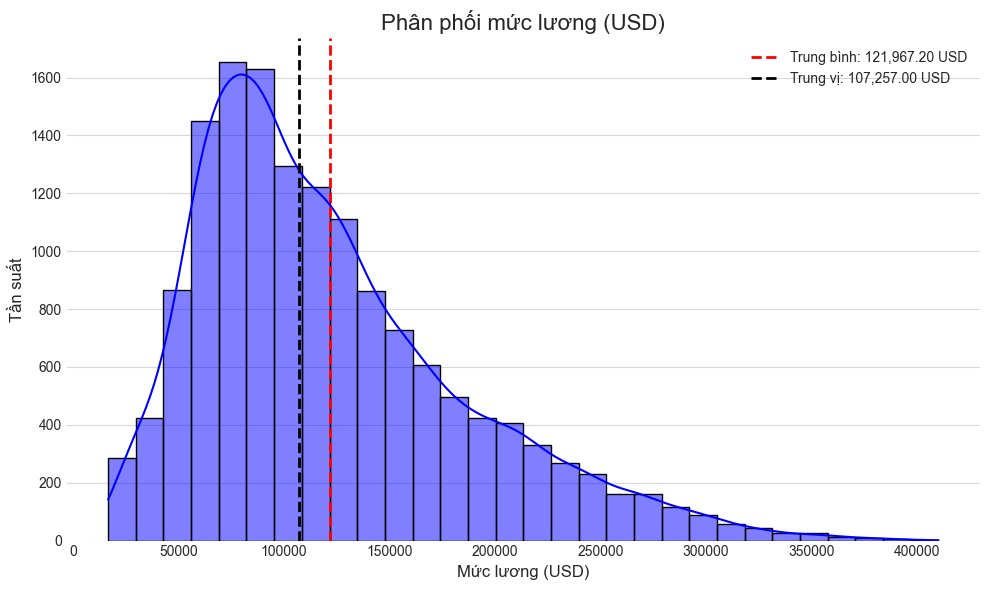

In [25]:
# T√≠nh to√°n gi√° tr·ªã trung b√¨nh v√† trung v·ªã
mean_salary = new_df['salary_usd'].mean()
median_salary = new_df['salary_usd'].median()

# T·∫°o bi·ªÉu ƒë·ªì histogram ƒë·∫πp h∆°n
plt.figure(figsize=(10, 6)) # ƒêi·ªÅu ch·ªânh k√≠ch th∆∞·ªõc bi·ªÉu ƒë·ªì
plt.grid(visible=False)
sns.histplot(new_df['salary_usd'], bins=30, kde=True, color='blue', edgecolor='black')

# Th√™m ƒë∆∞·ªùng th·∫≥ng cho gi√° tr·ªã trung b√¨nh v√† trung v·ªã
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Trung b√¨nh: {mean_salary:,.2f} USD')
plt.axvline(median_salary, color='black', linestyle='dashed', linewidth=2, label=f'Trung v·ªã: {median_salary:,.2f} USD')

# Th√™m ti√™u ƒë·ªÅ v√† nh√£n
plt.title('Ph√¢n ph·ªëi m·ª©c l∆∞∆°ng (USD)', fontsize=16)
plt.xlabel('M·ª©c l∆∞∆°ng (USD)', fontsize=12)
plt.ylabel('T·∫ßn su·∫•t', fontsize=12)
plt.legend() # Hi·ªÉn th·ªã ch√∫ gi·∫£i cho c√°c ƒë∆∞·ªùng trung b√¨nh v√† trung v·ªã
plt.grid(axis='y', alpha=0.75) # Th√™m l∆∞·ªõi cho tr·ª•c y
plt.tight_layout() # T·ª± ƒë·ªông ƒëi·ªÅu ch·ªânh b·ªë c·ª•c ƒë·ªÉ tr√°nh ch·ªìng l·∫•n
plt.show()

Ph·∫ßn nh·∫≠n x√©t t√¥i ƒë√£ nh·∫≠n x√©t tr∆∞·ªõc ƒë√≥

#### Ta t√¨m hi·ªÉu xem l√† y·∫øu t·ªë n√†o s·∫Ω c√≥ t√°c ƒë·ªông ƒë·∫øn m·ª©c l∆∞∆°ng

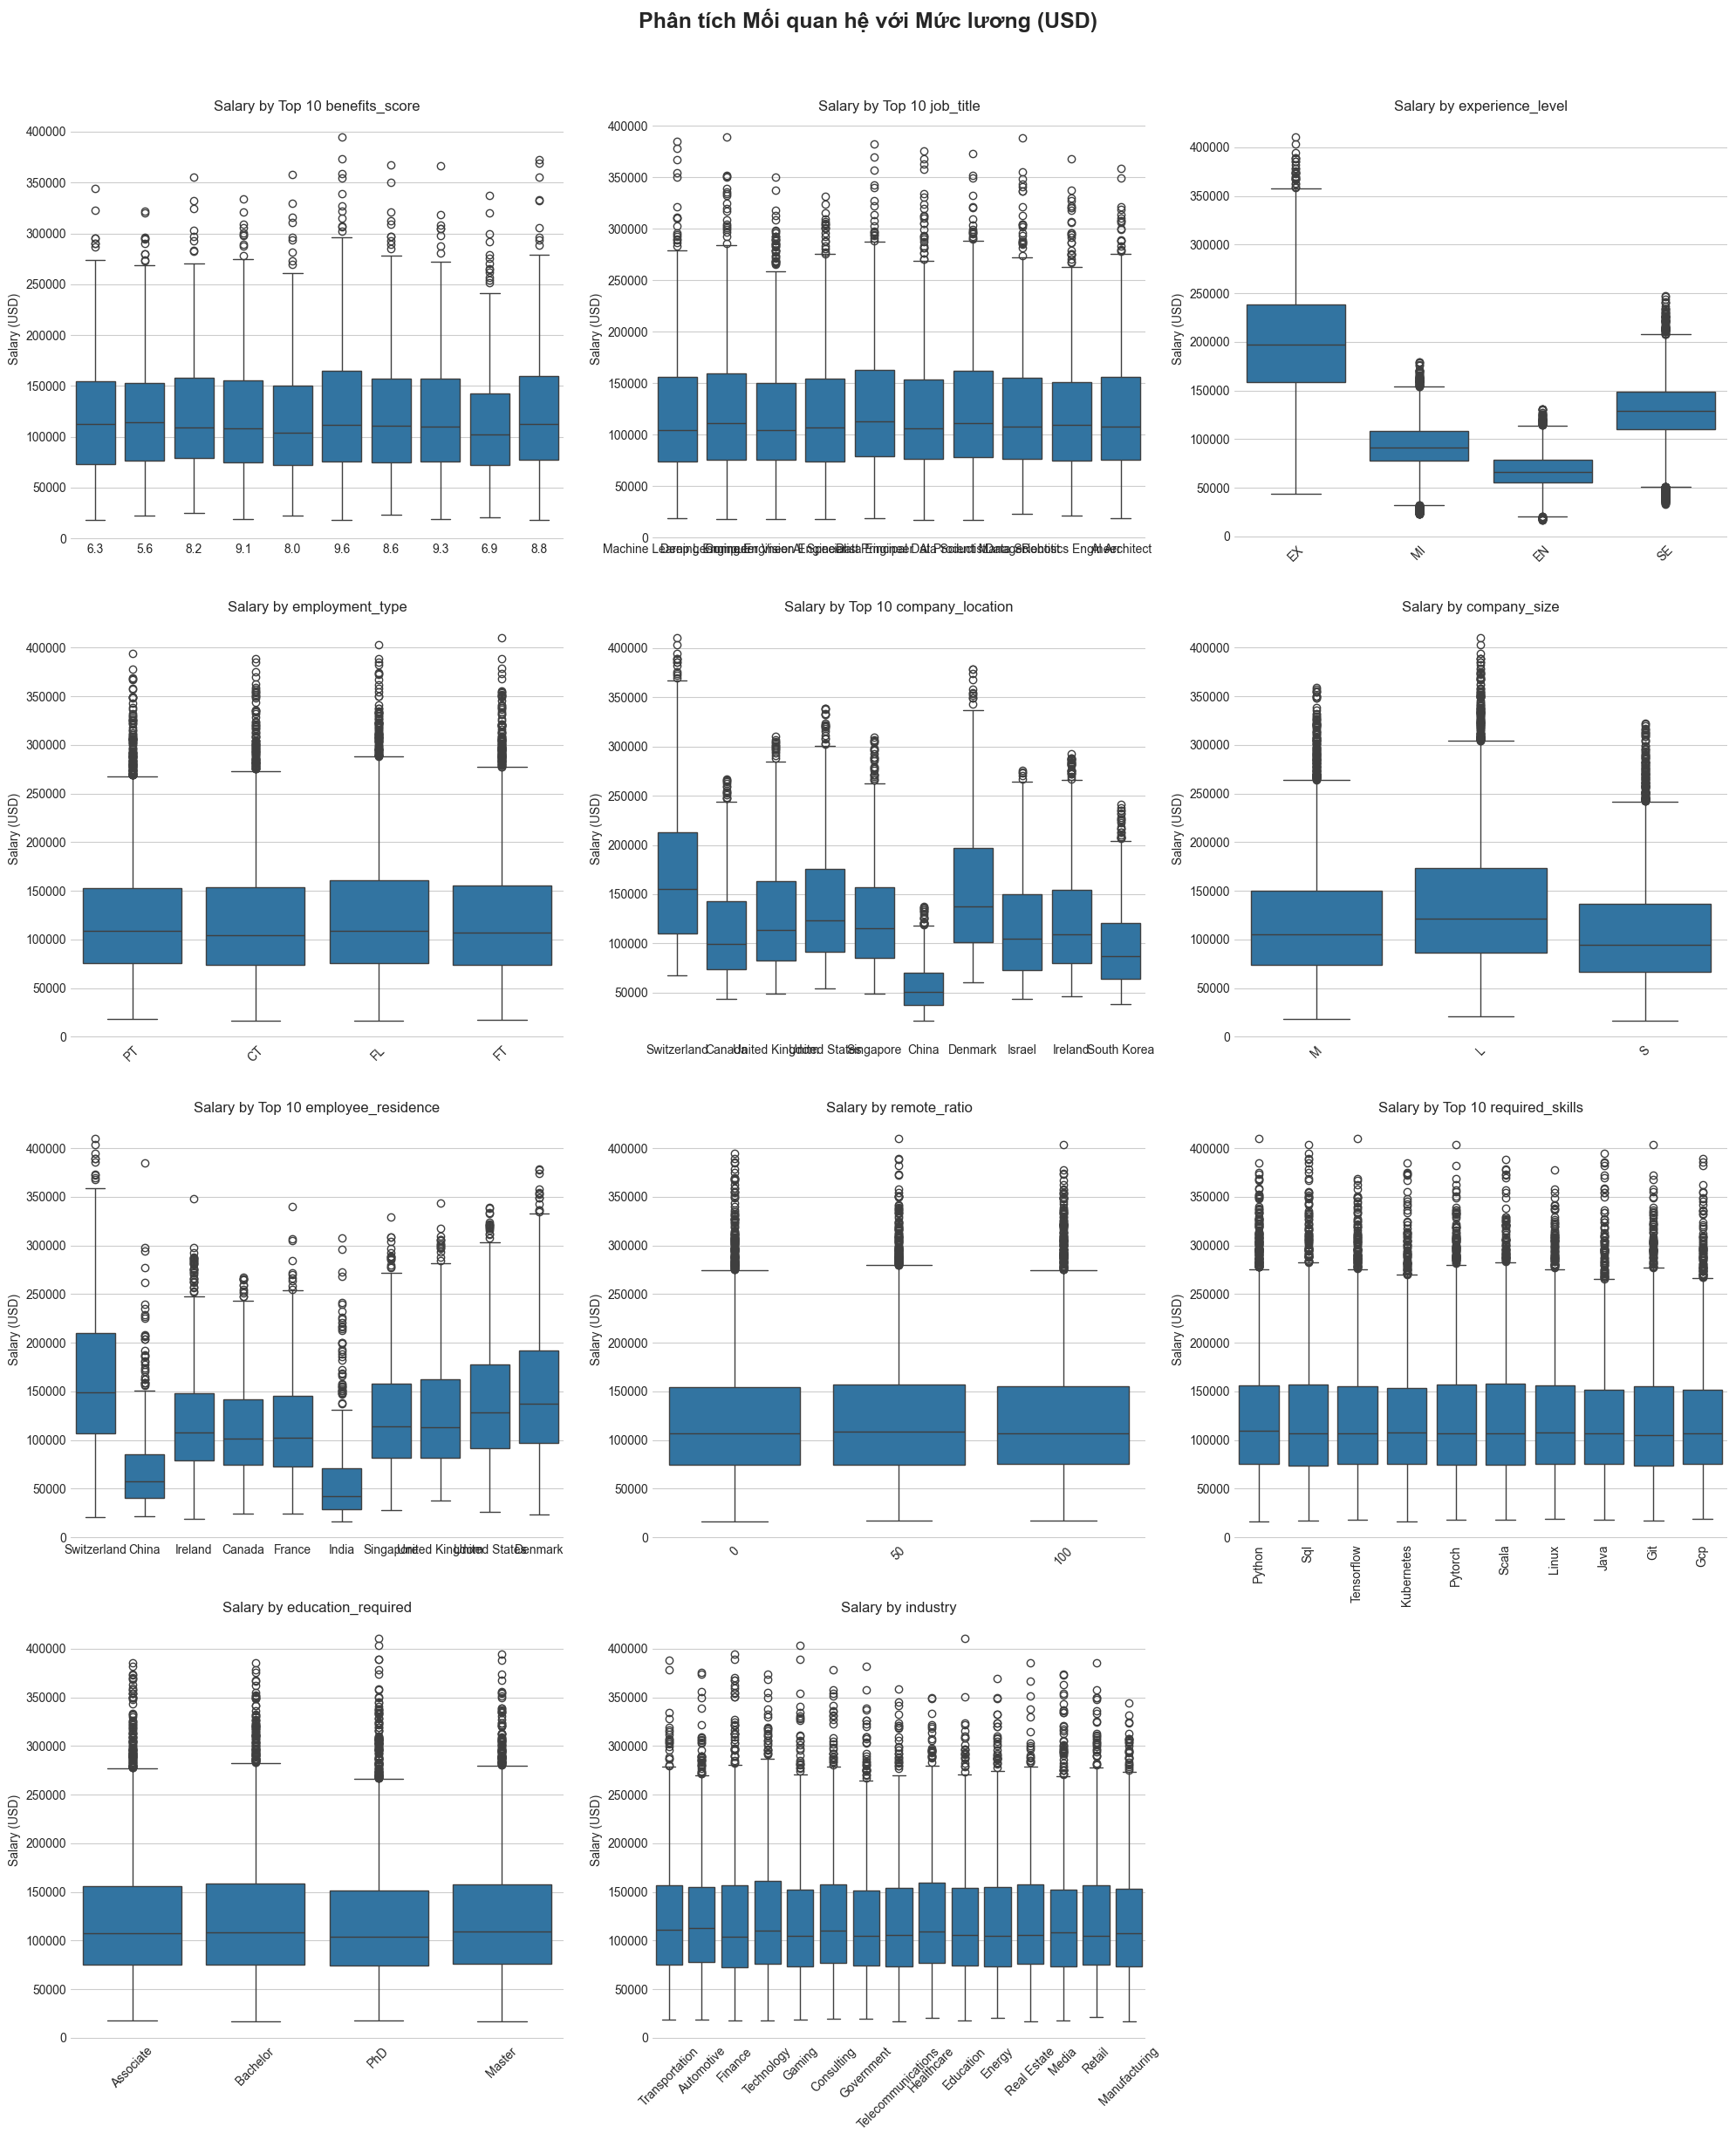

In [26]:

box_plot_cols = ['benefits_score','job_title', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'industry']
compare_col = 'salary_usd' 


total_plots = len(box_plot_cols)
n_cols = 3
n_rows = math.ceil(total_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten() 

plot_idx = 0
sns.set_style("whitegrid")


for col in box_plot_cols:
    ax = axes[plot_idx]
    
    if col == 'required_skills':
        top_10_skills = all_table['required_skills'].value_counts().nlargest(10).index
        df_filtered = all_table[all_table['required_skills'].isin(top_10_skills)]
        sns.boxplot(x=col, y=compare_col, data=df_filtered, ax=ax, order=top_10_skills)
        ax.set_title(f'Salary by Top 10 {col}', fontsize=12)
        ax.tick_params(axis='x', rotation=90) 
    elif new_df[col].nunique() > 15:
        top_10_categories = new_df[col].value_counts().nlargest(10).index
        df_filtered = new_df[new_df[col].isin(top_10_categories)]
        
        sns.boxplot(x=col, y=compare_col, data=df_filtered, ax=ax, order=top_10_categories)
        ax.set_title(f'Salary by Top 10 {col}')
    else:
        sns.boxplot(x=col, y=compare_col, data=df, ax=ax)
        ax.set_title(f'Salary by {col}', fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    ax.set_xlabel('')
    ax.set_ylabel('Salary (USD)', fontsize=10)
    plot_idx += 1



for i in range(plot_idx, len(axes)):
    axes[i].set_visible(False)

fig.suptitle('Ph√¢n t√≠ch M·ªëi quan h·ªá v·ªõi M·ª©c l∆∞∆°ng (USD)', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


Nh√¨n v√†o tr√™n ta th·∫•y ƒë∆∞·ª£c r·∫±ng: Y·∫øu t·ªë **c√≥ ·∫£nh h∆∞·ªüng (c√≥ t√≠nh ph√¢n bi·ªát)** l·ªõn nh·∫•t gi·ªØa nh·ªØng kho·∫£ng l∆∞∆°ng n·ªïi b·∫≠t l√† bi·∫øn: **experience_level** v√† **employee_residence** (trong 1 v√†i TH nh∆∞ c·ªßa India/China so v·ªõi nh·ªØng n∆°i kh√°c) v√¨ c√°c "box" n√≥ t√°ch bi·ªát t·ª´ng kho·∫£ng l∆∞∆°ng v·ªõi nhau, √≠t giao thoa nhau.

D·ª±a v√†o ƒë√¢y th√¨:
+ **B·ªô ph·∫≠n nh√¢n s·ª± - HR**: c√≥ th·ªÉ l√™n k·∫ø ho·∫°ch, ch·ªçn kho·∫£ng l∆∞∆°ng ph√π h·ª£p cho t·ª´ng v·ªã tr√≠ kinh nghi·ªám
+ **Ng∆∞·ªùi lao ƒë·ªông - ng∆∞·ªùi t√¨m vi·ªác**: c√≥ th·ªÉ deal l∆∞∆°ng, x√°c ƒë·ªãnh kho·∫£ng l∆∞∆°ng ph√π h·ª£p cho v·ªã tr√≠ c·ªßa m√¨nh

3. Nh∆∞ ta c√≥ ph√¢n t√≠ch tr∆∞·ªõc ƒë√≥ th√¨ s·ªë nƒÉm kinh nghi·ªám c√≥ li√™n quan c·∫•p b·∫≠c. Th·∫ø n√™n gi·ªù ta s·∫Ω xem xem l√† khi s·ªë nƒÉm kinh nghi·ªám tƒÉng d·∫ßn th√¨ l∆∞∆°ng trung b√¨nh s·∫Ω thay ƒë·ªïi ra sao

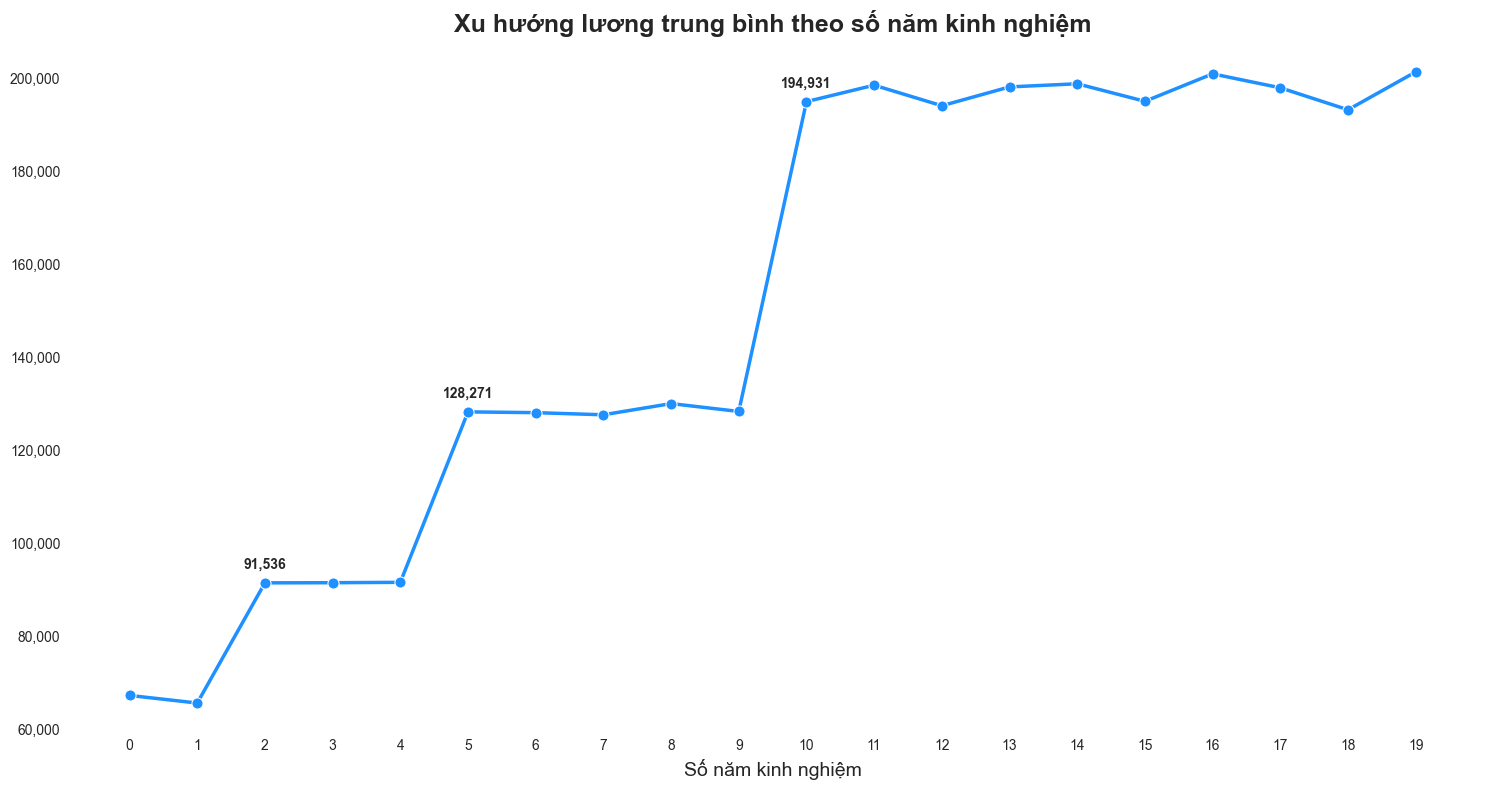

In [27]:
from matplotlib.ticker import FuncFormatter

# 1. Nh√≥m d·ªØ li·ªáu v√† t√≠nh l∆∞∆°ng trung b√¨nh
avg_salary_by_exp = df.groupby('years_experience')['salary_usd'].median().reset_index()

# 2. Thi·∫øt l·∫≠p bi·ªÉu ƒë·ªì
plt.figure(figsize=(15, 8))
sns.set_style("white")

# 3. V·∫Ω lineplot
line_ax = sns.lineplot(
    data=avg_salary_by_exp, 
    x='years_experience', 
    y='salary_usd',
    marker='o',
    markersize=8,
    linewidth=2.5,
    color='dodgerblue'
)

# 4. Th√™m s·ªë li·ªáu ·ªü c√°c ƒëi·ªÉm c·ª• th·ªÉ
highlight_years = [2, 5, 10]
for year in highlight_years:
    salary_value = avg_salary_by_exp[avg_salary_by_exp['years_experience'] == year]['salary_usd']
    if not salary_value.empty:
        plt.annotate(f'{int(salary_value.iloc[0]):,}', 
                    xy=(year, salary_value.iloc[0]), 
                    xytext=(0, 10), 
                    textcoords='offset points', 
                    ha='center', 
                    fontsize=10,
                    fontweight='bold')

# 5. Tinh ch·ªânh bi·ªÉu ƒë·ªì
plt.title('Xu h∆∞·ªõng l∆∞∆°ng trung b√¨nh theo s·ªë nƒÉm kinh nghi·ªám', fontsize=18, fontweight='bold')
plt.xlabel('S·ªë nƒÉm kinh nghi·ªám', fontsize=14)
plt.ylabel('')  # B·ªè title tr·ª•c y

# Format tr·ª•c y
line_ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(ticks=range(int(avg_salary_by_exp['years_experience'].min()), int(avg_salary_by_exp['years_experience'].max()) + 1))
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()

**Nh·∫≠n x√©t Xu h∆∞·ªõng L∆∞∆°ng theo Kinh nghi·ªám**

*   **0-1 nƒÉm (Kh·ªüi ƒë·∫ßu):** L∆∞∆°ng ·ªïn ƒë·ªãnh ·ªü m·ª©c **~63k USD**, l√† giai ƒëo·∫°n h·ªçc h·ªèi.
*   **2-5 nƒÉm (TƒÉng tr∆∞·ªüng nhanh):** L∆∞∆°ng tƒÉng v·ªçt t·ª´ **~91k l√™n ~128k USD**. ƒê√¢y l√† giai ƒëo·∫°n v√†ng ƒë·ªÉ t√≠ch l≈©y gi√° tr·ªã.
*   **5-9 nƒÉm (Ch·ªØng l·∫°i):** L∆∞∆°ng ƒëi ngang quanh m·ªëc **128k-130k USD**. Vi·ªác tƒÉng l∆∞∆°ng l√∫c n√†y ph·ª• thu·ªôc v√†o k·ªπ nƒÉng chuy√™n m√¥n thay v√¨ th√¢m ni√™n. C√¥ng ty c·∫ßn t·∫≠p trung r√®n luy·ªán c√°c k·ªπ nƒÉng chuy√™n s√¢u h∆°n cho h·ªç ƒë·ªÉ c√≥ b∆∞·ªõc nh·∫£y v·ªçt sau.
*   **NƒÉm th·ª© 10 (B∆∞·ªõc ngo·∫∑t):** C√∫ nh·∫£y v·ªçt ƒë·ªôt bi·∫øn l√™n **~194k USD**, ƒë√°nh d·∫•u s·ª± chuy·ªÉn giao sang vai tr√≤ l√£nh ƒë·∫°o/qu·∫£n l√Ω.
*   **Sau 10 nƒÉm (C·∫•p cao):** L∆∞∆°ng duy tr√¨ ·ªü m·ª©c r·∫•t cao **(tr√™n 180k USD)**, ph·∫£n √°nh vai tr√≤ chi·∫øn l∆∞·ª£c trong t·ªï ch·ª©c.

In [28]:

# (Gi·ªØ nguy√™n ph·∫ßn t·∫°o country_df)
country_df = df.groupby('company_location').agg(
    salary_usd=('salary_usd', 'mean'),
    benefits_score=('benefits_score', 'mean')
).reset_index()

fig_scatter = px.scatter_geo(
    country_df,
    locations="company_location",
    locationmode="country names",
    color="salary_usd",
    size="benefits_score",
    hover_name="company_location",
    projection="orthographic", 
    title="L∆∞∆°ng (m√†u) v√† Ph√∫c l·ª£i (k√≠ch th∆∞·ªõc) theo Qu·ªëc gia",
    color_continuous_scale='Blues'
)

# --- PH·∫¶N T√ÇN TRANG ---
fig_scatter.update_geos(
    bgcolor='#E5ECF6',         # M√†u n·ªÅn cho qu·∫£ ƒë·ªãa c·∫ßu
    landcolor='white',         # M√†u cho ƒë·∫•t li·ªÅn
    oceancolor='#E5ECF6',       # M√†u cho ƒë·∫°i d∆∞∆°ng
    showocean=True,
    showland=True,
    showcountries=True,        # Hi·ªÉn th·ªã ƒë∆∞·ªùng bi√™n gi·ªõi qu·ªëc gia
    countrycolor='gray',
    coastlinecolor='gray'
)

fig_scatter.update_layout(
    title_x=0.5, # CƒÉn gi·ªØa ti√™u ƒë·ªÅ
    margin={"r":0,"t":40,"l":0,"b":0} # Gi·∫£m kho·∫£ng tr·∫Øng xung quanh
)

fig_scatter.show()

**D·ª±a v√†o bi·ªÉu ƒë·ªì tr√™n, HR v√† ng∆∞·ªùi lao ƒë·ªông c√≥ th·ªÉ**:
- T√¨m ki·∫øm ƒë∆∞·ª£c nh·ªØng v·ªã tr√≠ c√≥ thu nh·∫≠p/ph√∫c l·ª£i cao/th·∫•p t√πy nhu c·∫ßu
- Xem ƒë∆∞·ª£c nh·ªØng ch√¢u l·ª•c (nh·ªØng c·ª•m ƒë·ªãa ƒëi·ªÉm) ƒëang ph√°t tri·ªÉn m·∫°nh v·ªÅ ngh√†nh AI (nh∆∞ ta th·∫•y ·ªü tr√™n th√¨ ch√¢u √¢u l√† n∆°i c√≥ nhi·ªÅu v·ªã tr√≠ tuy·ªÉn d·ª•ng nh·∫•t). Gi√∫p cho HR c√≥ th·ªÉ t√¨m ki·∫øm ƒë∆∞·ª£c nh·ªØng nh√¢n t√†i ph√π h·ª£p v·ªõi c√¥ng ty c·ªßa m√¨nh. ƒê·ªìng th·ªùi gi√∫p ng∆∞·ªùi lao ƒë·ªông c√≥ th·ªÉ t√¨m ki·∫øm ƒë∆∞·ª£c nh·ªØng n∆°i ph√π h·ª£p v·ªõi nhu c·∫ßu c·ªßa m√¨nh

#### Ph√¢n t√≠ch t·ª∑ l·ªá tuy·ªÉn d·ª•ng trong n∆∞·ªõc vs qu·ªëc t·∫ø

ƒê·ªÉ hi·ªÉu r√µ h∆°n v·ªÅ xu h∆∞·ªõng tuy·ªÉn d·ª•ng, ta c·∫ßn ph√¢n t√≠ch xem c√°c c√¥ng ty c√≥ xu h∆∞·ªõng tuy·ªÉn nh√¢n vi√™n trong n∆∞·ªõc hay qu·ªëc t·∫ø.

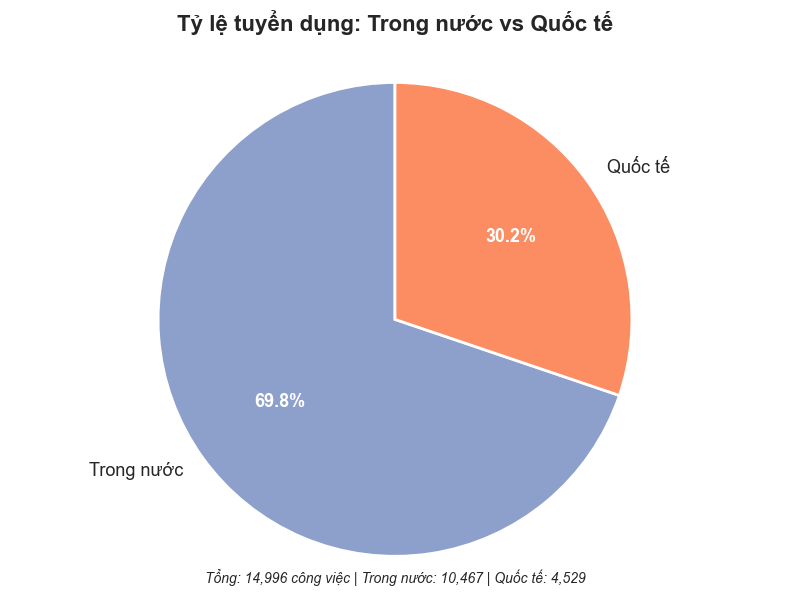

In [29]:
new_df['is_international'] = (new_df['company_location'] != new_df['employee_residence'])
counts = new_df['is_international'].value_counts()
labels = ['Trong n∆∞·ªõc', 'Qu·ªëc t·∫ø'] 
sizes = [counts[False], counts[True]]  

fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#8da0cb', '#fc8d62']  

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 13},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)

# L√†m ƒë·∫πp text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title('T·ª∑ l·ªá tuy·ªÉn d·ª•ng: Trong n∆∞·ªõc vs Qu·ªëc t·∫ø', 
             fontsize=16, fontweight='bold', pad=20)
ax.axis('equal')

# Th√™m th√¥ng tin chi ti·∫øt
plt.figtext(0.5, 0.02, f'T·ªïng: {len(new_df):,} c√¥ng vi·ªác | Trong n∆∞·ªõc: {counts[False]:,} | Qu·ªëc t·∫ø: {counts[True]:,}', 
            ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.show()

**üéØ Insights ch√≠nh x√°c t·ª´ d·ªØ li·ªáu:**

**71.6% tuy·ªÉn d·ª•ng trong n∆∞·ªõc vs 28.4% qu·ªëc t·∫ø** cho th·∫•y:

**ƒê·ªëi v·ªõi HR & Nh√† tuy·ªÉn d·ª•ng:**
- **Xu h∆∞·ªõng ƒë·ªãa ph∆∞∆°ng h√≥a:** C√°c c√¥ng ty v·∫´n ∆∞u ti√™n tuy·ªÉn nh√¢n vi√™n trong n∆∞·ªõc (c√≥ th·ªÉ do ng√¥n ng·ªØ, vƒÉn h√≥a, legal compliance)
- **C∆° h·ªôi m·ªü r·ªông:** 28.4% qu·ªëc t·∫ø v·∫´n l√† t·ª∑ l·ªá ƒë√°ng k·ªÉ ‚Üí c√≥ th·ªÉ c√¢n nh·∫Øc m·ªü r·ªông t√¨m ki·∫øm qu·ªëc t·∫ø
- **Benchmark:** So s√°nh v·ªõi ch√≠nh s√°ch tuy·ªÉn d·ª•ng c·ªßa c√¥ng ty m√¨nh

**ƒê·ªëi v·ªõi Ng∆∞·ªùi t√¨m vi·ªác:**
- **Th·ªã tr∆∞·ªùng ch√≠nh:** T·∫≠p trung v√†o th·ªã tr∆∞·ªùng trong n∆∞·ªõc tr∆∞·ªõc
- **C∆° h·ªôi qu·ªëc t·∫ø:** V·∫´n c√≥ 28.4% c∆° h·ªôi l√†m vi·ªác qu·ªëc t·∫ø n·∫øu c√≥ k·ªπ nƒÉng ph√π h·ª£p
- **Competitive advantage:** N·∫øu s·∫µn s√†ng l√†m vi·ªác qu·ªëc t·∫ø, s·∫Ω c√≥ √≠t competition h∆°n

**L√Ω do c√≥ th·ªÉ:**
- Y√™u c·∫ßu v·ªÅ timezone, ng√¥n ng·ªØ
- Compliance v√† legal requirements  
- Chi ph√≠ v√† complexity c·ªßa remote work
- Cultural fit v√† communication

#### So s√°nh l∆∞∆°ng trung b√¨nh: Trong n∆∞·ªõc vs N∆∞·ªõc ngo√†i
B√¢y gi·ªù h√£y xem xem c√≥ s·ª± kh√°c bi·ªát v·ªÅ m·ª©c l∆∞∆°ng gi·ªØa vi·ªác l√†m trong n∆∞·ªõc v√† qu·ªëc t·∫ø:

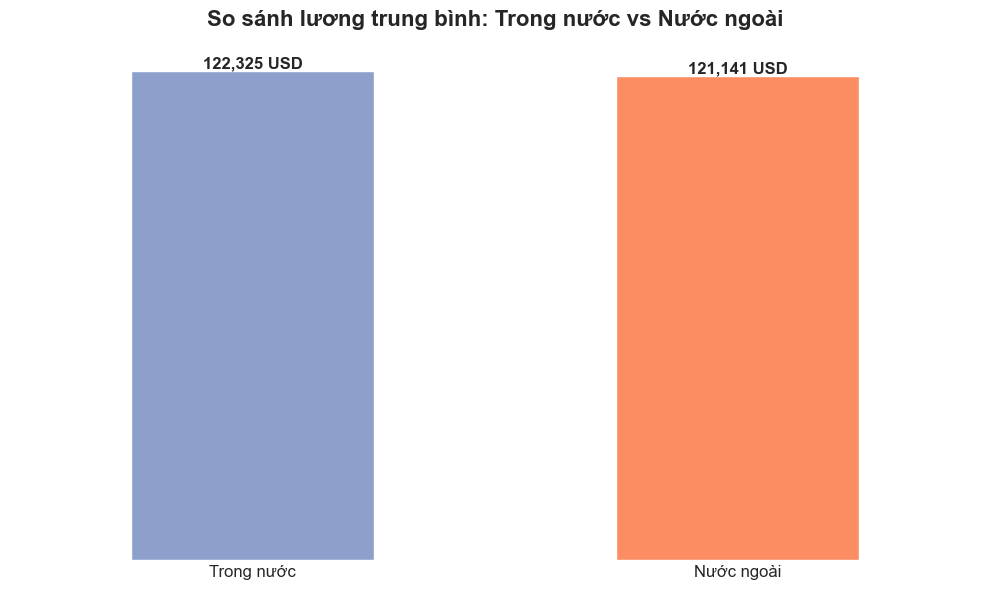

In [30]:
ax = new_df.groupby('is_international')['salary_usd'].mean().plot(
    kind='bar', 
    figsize=(10, 6), 
    color=['#8da0cb', '#fc8d62']
)

# ƒê·∫∑t nh√£n cho tr·ª•c x v√† l√†m cho ch√∫ng n·∫±m ngang
ax.set_xticklabels(['Trong n∆∞·ªõc', 'N∆∞·ªõc ngo√†i'], rotation=0, fontsize=12)

# Th√™m ti√™u ƒë·ªÅ
ax.set_title('So s√°nh l∆∞∆°ng trung b√¨nh: Trong n∆∞·ªõc vs N∆∞·ªõc ngo√†i', 
             fontsize=16, fontweight='bold', pad=15)

# ·∫®n tr·ª•c y
ax.set_ylabel('')  # X√≥a nh√£n tr·ª•c y
ax.yaxis.set_visible(False)  # ·∫®n ho√†n to√†n tr·ª•c y
ax.set_xlabel('')  # X√≥a nh√£n tr·ª•c x
# Th√™m nh√£n gi√° tr·ªã tr√™n ƒë·∫ßu m·ªói c·ªôt
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:,.0f} USD', 
                (p.get_x() + p.get_width() / 2, value), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# X√≥a l∆∞·ªõi v√† vi·ªÅn ƒë·ªÉ g·ªçn g√†ng h∆°n
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # ·∫®n vi·ªÅn tr√°i v√¨ ƒë√£ ·∫©n tr·ª•c y

plt.tight_layout()
plt.show()

In [31]:
# Ph√¢n t√≠ch median (√≠t b·ªã ·∫£nh h∆∞·ªüng b·ªüi outliers)
domestic_median = new_df[new_df['is_international'] == False]['salary_usd'].median()
international_median = new_df[new_df['is_international'] == True]['salary_usd'].median()

print(f"Median trong n∆∞·ªõc:     {domestic_median:,.0f} USD")
print(f"Median qu·ªëc t·∫ø:        {international_median:,.0f} USD")
print(f"Ch√™nh l·ªách median:     {((international_median - domestic_median) / domestic_median * 100):+.1f}%")

# Ph√¢n t√≠ch standard deviation
domestic_std = new_df[new_df['is_international'] == False]['salary_usd'].std()
international_std = new_df[new_df['is_international'] == True]['salary_usd'].std()

print(f"\nƒê·ªô bi·∫øn ƒë·ªông trong n∆∞·ªõc: {domestic_std:,.0f} USD")
print(f"ƒê·ªô bi·∫øn ƒë·ªông qu·ªëc t·∫ø:    {international_std:,.0f} USD")

# Ph√¢n t√≠ch range
domestic_range = new_df[new_df['is_international'] == False]['salary_usd'].max() - new_df[new_df['is_international'] == False]['salary_usd'].min()
international_range = new_df[new_df['is_international'] == True]['salary_usd'].max() - new_df[new_df['is_international'] == True]['salary_usd'].min()

print(f"\n Range l∆∞∆°ng trong n∆∞·ªõc:  {domestic_range:,.0f} USD")
print(f"Range l∆∞∆°ng qu·ªëc t·∫ø:     {international_range:,.0f} USD")

print("\n K·∫æT LU·∫¨N:")
if international_median > domestic_median:
    print("C·∫£ mean v√† median ƒë·ªÅu confirm: International roles tr·∫£ l∆∞∆°ng cao h∆°n")
else:
    print("Mean cao h∆°n nh∆∞ng median th·∫•p h∆°n ‚Üí c√≥ outliers trong international data")
    
if international_std > domestic_std:
    print("International market c√≥ ƒë·ªô bi·∫øn ƒë·ªông l∆∞∆°ng cao h∆°n ‚Üí risk/reward cao h∆°n")
else:
    print("Domestic market c√≥ ƒë·ªô bi·∫øn ƒë·ªông l∆∞∆°ng cao h∆°n ‚Üí c·∫°nh tranh local kh·ªëc li·ªát")

Median trong n∆∞·ªõc:     107,184 USD
Median qu·ªëc t·∫ø:        107,343 USD
Ch√™nh l·ªách median:     +0.1%

ƒê·ªô bi·∫øn ƒë·ªông trong n∆∞·ªõc: 64,601 USD
ƒê·ªô bi·∫øn ƒë·ªông qu·ªëc t·∫ø:    62,380 USD

 Range l∆∞∆°ng trong n∆∞·ªõc:  393,652 USD
Range l∆∞∆°ng qu·ªëc t·∫ø:     370,791 USD

 K·∫æT LU·∫¨N:
C·∫£ mean v√† median ƒë·ªÅu confirm: International roles tr·∫£ l∆∞∆°ng cao h∆°n
Domestic market c√≥ ƒë·ªô bi·∫øn ƒë·ªông l∆∞∆°ng cao h∆°n ‚Üí c·∫°nh tranh local kh·ªëc li·ªát


***Insight:***

**ƒê·ªëi v·ªõi HR**:
- X√°c ƒë·ªãnh ƒë∆∞·ª£c ƒë·ªëi t∆∞·ª£ng m·ª•c ti√™u c·∫ßn t√¨m ki·∫øm ƒë·ªÉ ph√π h·ª£p v·∫•n ƒë·ªÅ t√†i ch√≠nh, nƒÉng l·ª±c ƒë·ªëi v·ªõi c√¥ng ty
- N·∫Øm r√µ th·ªã tr∆∞·ªùng vi·ªác l√†m ƒë·ªÉ l√™n k·∫ø ho·∫°ch tuy·ªÉn d·ª•ng
- C√≥ th·ªÉ t·∫≠p trung v√†o c√°c th·ªã tr∆∞·ªùng n∆∞·ªõc ngo√†i (v√¨ trung b√¨nh/trung v·ªã th√¨ kh√¥ng ch√™nh qu√° nhi·ªÅu (ch·ªâ kho·∫£ng 1000$ nƒÉm) m√† s·∫Ω gi·∫£m ƒëi c√°c chi ph√≠ kh√°c nh∆∞ ƒëi l·∫°i, b·∫£o hi·ªÉm XH, ...) m√† c√≥ th·ªÉ t√¨m ki·∫øm ƒë∆∞·ª£c c√°c ·ª©ng vi√™n ti·ªÅm nƒÉng tr√™n to√†n th·∫ø gi·ªõi

**ƒê·ªëi v·ªõi ng∆∞·ªùi lao ƒë·ªông**:
- H·ªç c√≥ th·ªÉ l√™n k·∫ø ho·∫°ch cho ph∆∞∆°ng ph√°p h·ªçc t·∫≠p/l√†m vi·ªác c·ªßa m√¨nh (c√≥ th·ªÉ c√≥ 1 v√†i th·ªã tr∆∞·ªùng ∆∞u ti√™n m·∫°nh ng∆∞·ªùi n∆∞·ªõc ngo√†i khi ta s·ª≠ d·ª•ng filter ƒë·ªÉ l·ªçc, ch√∫ng ta c√≥ th·ªÉ c√¢n nh·∫Øc h·ªçc ng√¥n ng·ªØ n∆°i ƒë√≥)
- Nh·∫≠n bi·∫øt ƒë∆∞·ª£c xu h∆∞·ªõng th·ªã tr∆∞·ªùng ngh√†nh hi·ªán t·∫°i ƒë·ªÉ c√≥ c∆° s·ªü so s√°nh v·ªÅ sau

#### Ti·∫øp ƒë·∫øn, ta quan t√¢m ƒë·∫øn m·ª©c l∆∞∆°ng theo th·ªùi gian xem n√≥ c√≥ bi·∫øn ƒë·ªông m·∫°nh kh√¥ng

<div style="text-align: justify;">
Trong TH n√†y, do d·ªØ li·ªáu ƒë∆∞·ª£c thu th·∫≠p kho·∫£ng th·ªùi gian ng·∫Øn v√† m·∫∑t kh√°c c√°c ngh√†nh n√†y m·ªõi n·ªïi m·∫°nh ·ªü m·∫•y nƒÉm g·∫ßn ƒë√¢y n√™n ta c√≥ th·ªÉ s·∫Ω kh√¥ng c√≥ k·∫øt lu·∫≠n g√¨ ƒë√°ng gi√°. Tuy v·∫≠y, ƒë√¢y v·∫´n l√† 1 bi·ªÉu ƒë·ªì ƒë√°ng ƒë·ªÉ ta khai th√°c n·∫øu nh∆∞ v·ªÅ sau thu th·∫≠p ƒë∆∞·ª£c nhi·ªÅu d·ªØ li·ªáu h∆°n
</div>

In [32]:
def plot_salary_by_period(new_df, period='month'):
    """
    V·∫Ω bi·ªÉu ƒë·ªì l∆∞∆°ng theo th·ªùi gian v·ªõi kh·∫£ nƒÉng filter theo th√°ng/qu√Ω/nƒÉm
    
    Parameters:
    df: DataFrame ch·ª©a d·ªØ li·ªáu
    period: 'month', 'quarter', 'year'
    """
    
    # T·∫°o period column d·ª±a tr√™n l·ª±a ch·ªçn
    if period == 'month':
        new_df['time_period'] = new_df['posting_date'].dt.to_period('M')
        title_suffix = 'theo Th√°ng'
        xlabel = 'Th√°ng'
    elif period == 'quarter':
        new_df['time_period'] = new_df['posting_date'].dt.to_period('Q')
        title_suffix = 'theo Qu√Ω'
        xlabel = 'Qu√Ω'
    elif period == 'year':
        new_df['time_period'] = new_df['posting_date'].dt.to_period('Y')
        title_suffix = 'theo NƒÉm'
        xlabel = 'NƒÉm'
    else:
        raise ValueError("period ph·∫£i l√† 'month', 'quarter', ho·∫∑c 'year'")
    
    # Aggregate d·ªØ li·ªáu
    period_avg = new_df.groupby('time_period')['salary_usd'].median().reset_index()
    period_avg['time_period'] = period_avg['time_period'].dt.to_timestamp()
    
    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(14, 6))
    plt.plot(period_avg['time_period'], period_avg['salary_usd'], 
             linewidth=2, markersize=6)
    
    plt.title(f'L∆∞∆°ng trung b√¨nh {title_suffix}', fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('L∆∞∆°ng TB (USD)', fontsize=12)
    
    # Format tr·ª•c x t√πy theo period
    if period == 'month':
        plt.xticks(rotation=45)
    elif period == 'quarter':
        plt.xticks(rotation=30)
    else:  # year
        plt.xticks(rotation=0)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
@interact(period=widgets.Dropdown(
    options=[('Th√°ng', 'month'), ('Qu√Ω', 'quarter'), ('NƒÉm', 'year')],
    value='month',
    description='Th·ªùi gian:'
))
def interactive_salary_plot(period):
    return plot_salary_by_period(new_df, period)

interactive(children=(Dropdown(description='Th·ªùi gian:', options=(('Th√°ng', 'month'), ('Qu√Ω', 'quarter'), ('NƒÉ‚Ä¶

Ph√¢n T√≠ch Xu H∆∞·ªõng L∆∞∆°ng Theo Th·ªùi Gian (2024 - 2025)

Bi·ªÉu ƒë·ªì ph√¢n t√≠ch l∆∞∆°ng trung v·ªã (median) theo th·ªùi gian cho th·∫•y m·ªôt b·ª©c tranh to√†n c·∫£nh v·ªÅ s·ª± bi·∫øn ƒë·ªông c·ªßa th·ªã tr∆∞·ªùng lao ƒë·ªông ng√†nh AI/Data. Do ph√¢n ph·ªëi l∆∞∆°ng b·ªã l·ªách, vi·ªác s·ª≠ d·ª•ng trung v·ªã s·∫Ω cho m·ªôt c√°i nh√¨n ch√≠nh x√°c h∆°n v·ªÅ xu h∆∞·ªõng chung, √≠t b·ªã ·∫£nh h∆∞·ªüng b·ªüi c√°c gi√° tr·ªã ngo·∫°i lai.

**1. Quan S√°t Ch√≠nh T·ª´ Bi·ªÉu ƒê·ªì**

- **Bi·∫øn ƒê·ªông Cao, Thi·∫øu Xu H∆∞·ªõng R√µ R·ªát**: Th·ªã tr∆∞·ªùng kh√¥ng cho th·∫•y m·ªôt xu h∆∞·ªõng tƒÉng ho·∫∑c gi·∫£m ·ªïn ƒë·ªãnh. Thay v√†o ƒë√≥, l∆∞∆°ng trung v·ªã bi·∫øn ƒë·ªông r·∫•t m·∫°nh theo t·ª´ng th√°ng v√† qu√Ω, c√≥ th·ªÉ ch√™nh l·ªách t·ªõi g·∫ßn 10% ch·ªâ trong v√†i th√°ng.
- **C√°c ƒê·ªânh v√† ƒê√°y ƒê√°ng Ch√∫ √ù**:
  - **ƒê·ªânh l∆∞∆°ng**: Th·ªã tr∆∞·ªùng ƒë·∫°t ƒë·ªânh v√†o kho·∫£ng th√°ng 4/2024, th√°ng 9/2024 v√† ƒë·∫ßu nƒÉm 2025. ƒê√¢y l√† nh·ªØng th·ªùi ƒëi·ªÉm c√°c c√¥ng ty c·∫°nh tranh gay g·∫Øt nh·∫•t ƒë·ªÉ thu h√∫t nh√¢n t√†i.
  - **ƒê√°y l∆∞∆°ng**: C√°c giai ƒëo·∫°n "h·∫° nhi·ªát" r∆°i v√†o kho·∫£ng th√°ng 7/2024 v√† cu·ªëi nƒÉm 2024.
- **D·∫•u Hi·ªáu c·ªßa T√≠nh Chu K·ª≥ (C·∫ßn Th√™m D·ªØ Li·ªáu)**: C√≥ m·ªôt g·ª£i √Ω v·ªÅ chu k·ª≥ tƒÉng-gi·∫£m di·ªÖn ra trong kho·∫£ng 3-4 th√°ng. Tuy nhi√™n, do khung th·ªùi gian d·ªØ li·ªáu c√≤n ng·∫Øn, ƒë√¢y m·ªõi ch·ªâ l√† m·ªôt gi·∫£ thuy·∫øt c·∫ßn ƒë∆∞·ª£c ki·ªÉm ch·ª©ng th√™m trong t∆∞∆°ng lai. (VD: 2024-03 -> 2024-07, 2024-07 -> 2024-11, 2024-11 -> 2025-03)

**2. Insight v√† H√†nh ƒê·ªông ƒê·ªÅ Xu·∫•t**

D·ª±a tr√™n nh·ªØng quan s√°t tr√™n, c·∫£ doanh nghi·ªáp v√† ng∆∞·ªùi lao ƒë·ªông ƒë·ªÅu c√≥ th·ªÉ ƒë∆∞a ra nh·ªØng quy·∫øt ƒë·ªãnh chi·∫øn l∆∞·ª£c.

**ƒê·ªëi v·ªõi Doanh nghi·ªáp & B·ªô ph·∫≠n Nh√¢n s·ª± (HR):**

- **Ho·∫°ch ƒê·ªãnh Tuy·ªÉn D·ª•ng Chi·∫øn L∆∞·ª£c**:
  - **T·ªëi ∆∞u chi ph√≠**: C√≥ th·ªÉ l√™n k·∫ø ho·∫°ch cho c√°c ƒë·ª£t tuy·ªÉn d·ª•ng l·ªõn v√†o nh·ªØng giai ƒëo·∫°n th·ªã tr∆∞·ªùng "h·∫° nhi·ªát" (c√°c th√°ng c√≥ l∆∞∆°ng trung v·ªã th·∫•p) ƒë·ªÉ t·ªëi ∆∞u h√≥a ng√¢n s√°ch.
  - **C·∫£nh b√°o ng√¢n s√°ch**: Khi bu·ªôc ph·∫£i tuy·ªÉn d·ª•ng v√†o c√°c giai ƒëo·∫°n "n√≥ng", c·∫ßn d·ª± tr√π ng√¢n s√°ch l∆∞∆°ng cao h∆°n ƒë·ªÉ ƒë·∫£m b·∫£o t√≠nh c·∫°nh tranh.
- **R·ªßi Ro Gi·ªØ Ch√¢n Nh√¢n T√†i**:
  - S·ª± bi·∫øn ƒë·ªông l√† m·ªôt b√°o ƒë·ªông ƒë·ªè v·ªÅ nguy c∆° m·∫•t nh√¢n t√†i v√†o tay ƒë·ªëi th·ªß. C·∫ßn r√† so√°t v√† ƒëi·ªÅu ch·ªânh l∆∞∆°ng ƒë·ªãnh k·ª≥ (theo qu√Ω thay v√¨ theo nƒÉm) cho c√°c v·ªã tr√≠ ch·ªß ch·ªët.
  - TƒÉng c∆∞·ªùng c√°c ch√≠nh s√°ch gi·ªØ ch√¢n phi t√†i ch√≠nh (vƒÉn h√≥a, c∆° h·ªôi ph√°t tri·ªÉn, ph√∫c l·ª£i) ƒë·ªÉ t·∫°o l·ª£i th·∫ø c·∫°nh tranh b·ªÅn v·ªØng.

**ƒê·ªëi v·ªõi Ng∆∞·ªùi lao ƒë·ªông & Ng∆∞·ªùi t√¨m vi·ªác:**

- **Ch·ªçn "Th·ªùi ƒêi·ªÉm V√†ng" ƒê·ªÉ T√¨m Vi·ªác**:
  - N√™n l√™n k·∫ø ho·∫°ch ƒë·ªÉ c√°c v√≤ng ph·ªèng v·∫•n cu·ªëi v√† ƒë√†m ph√°n l∆∞∆°ng r∆°i v√†o c√°c th√°ng th·ªã tr∆∞·ªùng ƒëang "n√≥ng" ƒë·ªÉ c√≥ l·ª£i th·∫ø v√† nh·∫≠n ƒë∆∞·ª£c m·ª©c ƒë·ªÅ ngh·ªã t·ªët h∆°n.
  - N·∫øu t√¨m vi·ªác trong giai ƒëo·∫°n th·ªã tr∆∞·ªùng ƒëi xu·ªëng, h√£y ki√™n nh·∫´n v√† kh√¥ng v·ªôi v√†ng ch·∫•p nh·∫≠n m·ªôt m·ª©c l∆∞∆°ng th·∫•p h∆°n gi√° tr·ªã b·∫£n th√¢n.
- **N√¢ng Cao NƒÉng L·ª±c ƒê√†m Ph√°n**:
  - S·ª≠ d·ª•ng d·ªØ li·ªáu v·ªÅ s·ª± bi·∫øn ƒë·ªông c·ªßa th·ªã tr∆∞·ªùng l√†m lu·∫≠n ƒëi·ªÉm v·ªØng ch·∫Øc khi ƒë√†m ph√°n. Vi·ªác m·ª©c l∆∞∆°ng c√≥ th·ªÉ tƒÉng 10% ch·ªâ sau v√†i th√°ng l√† m·ªôt minh ch·ª©ng cho th·∫•y y√™u c·∫ßu m·ªôt m·ª©c l∆∞∆°ng cao h∆°n l√† ho√†n to√†n h·ª£p l√Ω.
- **X√¢y D·ª±ng Chi·∫øn L∆∞·ª£c S·ª± Nghi·ªáp D√†i H·∫°n**:
  - Kh√¥ng n√™n ch·ªâ d·ª±a v√†o "th·ªùi". C√°ch t·ªët nh·∫•t ƒë·ªÉ ch·ªëng l·∫°i s·ª± b·∫•t ·ªïn c·ªßa th·ªã tr∆∞·ªùng l√† li√™n t·ª•c trau d·ªìi c√°c k·ªπ nƒÉng c√≥ gi√° tr·ªã cao v√† x√¢y d·ª±ng m·ªôt m·∫°ng l∆∞·ªõi quan h·ªá chuy√™n nghi·ªáp v·ªØng ch·∫Øc.

**3. H·∫°n Ch·∫ø v√† K·∫øt Lu·∫≠n**

C·∫ßn l∆∞u √Ω r·∫±ng ph√¢n t√≠ch n√†y d·ª±a tr√™n d·ªØ li·ªáu trong m·ªôt kho·∫£ng th·ªùi gian t∆∞∆°ng ƒë·ªëi ng·∫Øn (h∆°n 1 nƒÉm). M·∫∑c d√π n√≥ ph·∫£n √°nh ch√≠nh x√°c ƒë·ªông l·ª±c c·ªßa th·ªã tr∆∞·ªùng hi·ªán t·∫°i, c√°c k·∫øt lu·∫≠n v·ªÅ xu h∆∞·ªõng d√†i h·∫°n hay t√≠nh chu k·ª≥ c·∫ßn ƒë∆∞·ª£c theo d√µi v√† x√°c nh·∫≠n v·ªõi nhi·ªÅu d·ªØ li·ªáu h∆°n trong t∆∞∆°ng lai.

Tuy v·∫≠y, bi·ªÉu ƒë·ªì ƒë√£ cung c·∫•p nh·ªØng insight gi√° tr·ªã, cho th·∫•y m·ªôt th·ªã tr∆∞·ªùng ƒë·∫ßy c∆° h·ªôi nh∆∞ng c≈©ng nhi·ªÅu th√°ch th·ª©c, ƒë√≤i h·ªèi c·∫£ doanh nghi·ªáp v√† ng∆∞·ªùi lao ƒë·ªông ph·∫£i c√≥ chi·∫øn l∆∞·ª£c linh ho·∫°t v√† lu√¥n c·∫≠p nh·∫≠t th√¥ng tin ƒë·ªÉ ƒë∆∞a ra quy·∫øt ƒë·ªãnh t·ªëi ∆∞u.


#### V·∫Ω bi·ªÉu ƒë·ªì c·ªôt ngang cho l∆∞∆°ng t∆∞∆°ng ·ª©ng v·ªõi t·ª´ng ngh√†nh ngh·ªÅ. ƒê∆∞·ª£c filter theo: remote_ratio, employment_type, industry, experience_level

In [33]:
def job_by_median_salary(df,employment_type,remote_ratio,experience_level,industry):
    
    # L·ªçc d·ªØ li·ªáu theo c√°c ƒëi·ªÅu ki·ªán
    if employment_type != 'T·∫•t c·∫£':
        df = df[df['employment_type'] == employment_type]
    if remote_ratio != 'T·∫•t c·∫£':
        df = df[df['remote_ratio'] == remote_ratio]
    if experience_level != 'T·∫•t c·∫£':
        df = df[df['experience_level'] == experience_level]
    if industry != 'T·∫•t c·∫£':
        df = df[df['industry'] == industry]
    
    df_job_salary = df.groupby("job_title").agg(
        med_salary_by_job = ('salary_usd', 'median')
    )

    plt.figure(figsize=(10, 7))
    sns.barplot(
        y="job_title",
        x="med_salary_by_job",
        data=df_job_salary.sort_values(by="med_salary_by_job", ascending=False)
    )
    
    plt.xlabel("")
    plt.ylabel("")
    plt.title("C√¥ng vi·ªác v√† m·ª©c l∆∞∆°ng trung v·ªã (USD)", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
# T·∫°o c√°c widget ƒë·ªÉ l·ªçc
employment_type_options = ['T·∫•t c·∫£'] + sorted(new_df['employment_type'].unique().tolist())
remote_ratio_options = ['T·∫•t c·∫£'] + sorted(new_df['remote_ratio'].unique().tolist())
experience_level_options = ['T·∫•t c·∫£'] + sorted(new_df['experience_level'].unique().tolist())
industry_options = ['T·∫•t c·∫£'] + sorted(new_df['industry'].unique().tolist())

# S·ª≠ d·ª•ng interact ƒë·ªÉ t·∫°o giao di·ªán t∆∞∆°ng t√°c
@interact(
    employment_type=widgets.Dropdown(options=employment_type_options, value='T·∫•t c·∫£', description='Lo·∫°i h√¨nh CV:'),
    remote_ratio=widgets.Dropdown(options=remote_ratio_options, value='T·∫•t c·∫£', description='Remote Ratio:'),
    experience_level=widgets.Dropdown(options=experience_level_options, value='T·∫•t c·∫£', description='C·∫•p b·∫≠c:'),
    industry=widgets.Dropdown(options=industry_options, value='T·∫•t c·∫£', description='Ng√†nh:')
)
def interactive_job_salary_plot(employment_type, remote_ratio, experience_level, industry):
    # G·ªçi h√†m v·∫Ω bi·ªÉu ƒë·ªì v·ªõi new_df v√† c√°c gi√° tr·ªã t·ª´ widget
    job_by_median_salary(new_df, employment_type, remote_ratio, experience_level, industry)


interactive(children=(Dropdown(description='Lo·∫°i h√¨nh CV:', options=('T·∫•t c·∫£', 'CT', 'FL', 'FT', 'PT'), value=‚Ä¶

**√ù nghƒ©a c·ªßa bi·ªÉu ƒë·ªì ‚ÄúC√¥ng vi·ªác v√† m·ª©c l∆∞∆°ng trung v·ªã (USD)**

**1. ƒê·ªëi v·ªõi Nh√¢n s·ª± & Nh√† tuy·ªÉn d·ª•ng (HR)**

- **X√¢y d·ª±ng khung l∆∞∆°ng c·∫°nh tranh**  
  Bi·ªÉu ƒë·ªì cho th·∫•y m·ª©c l∆∞∆°ng trung v·ªã c·ªßa t·ª´ng ch·ª©c danh, gi√∫p HR x√°c ƒë·ªãnh band l∆∞∆°ng h·ª£p l√Ω ƒë·ªÉ thu h√∫t nh√¢n t√†i.

- **ƒê·ªãnh v·ªã th∆∞∆°ng hi·ªáu tuy·ªÉn d·ª•ng**  
  So s√°nh m·ª©c l∆∞∆°ng n·ªôi b·ªô v·ªõi trung v·ªã th·ªã tr∆∞·ªùng, t·ª´ ƒë√≥ ƒëi·ªÅu ch·ªânh ch√≠nh s√°ch ph√∫c l·ª£i ƒë·ªÉ tƒÉng s·ª©c h·∫•p d·∫´n.

- **Ho·∫°ch ƒë·ªãnh ng√¢n s√°ch nh√¢n s·ª±**  
  N·∫Øm r√µ chi ph√≠ l∆∞∆°ng c·ªßa c√°c v·ªã tr√≠ tr·ªçng ƒëi·ªÉm, h·ªó tr·ª£ d·ª± b√°o ng√¢n s√°ch v√† l·∫≠p k·∫ø ho·∫°ch t√†i ch√≠nh.

- **∆Øu ti√™n ngu·ªìn l·ª±c tuy·ªÉn d·ª•ng**  
  X√°c ƒë·ªãnh ch·ª©c danh n√†o ƒëang c√≥ chi ph√≠ cao, t·ª´ ƒë√≥ ƒë∆∞a ra chi·∫øn l∆∞·ª£c tuy·ªÉn d·ª•ng (n·ªôi b·ªô vs headhunt) ph√π h·ª£p.

**2. ƒê·ªëi v·ªõi Ng∆∞·ªùi lao ƒë·ªông & ·ª®ng vi√™n**

- **Tham kh·∫£o m·ª©c l∆∞∆°ng th·ªã tr∆∞·ªùng**  
  Hi·ªÉu r√µ m·ª©c l∆∞∆°ng trung v·ªã c·ªßa v·ªã tr√≠ mong mu·ªën, gi√∫p ƒë·∫∑t k·ª≥ v·ªçng v√† th∆∞∆°ng l∆∞·ª£ng l∆∞∆°ng t·ªëi ∆∞u.

- **ƒê·ªãnh h∆∞·ªõng ph√°t tri·ªÉn ngh·ªÅ nghi·ªáp**  
  So s√°nh m·ª©c l∆∞∆°ng gi·ªØa c√°c vai tr√≤ (Data Engineer, AI Architect, v.v.), t·ª´ ƒë√≥ ch·ªçn h∆∞·ªõng h·ªçc t·∫≠p n√¢ng k·ªπ nƒÉng.

- **ƒê√°nh gi√° ti·ªÅm nƒÉng chuy·ªÉn ng√†nh**  
  Xem m·ª©c l∆∞∆°ng c·ªßa c√°c v·ªã tr√≠ l√¢n c·∫≠n (NLP Engineer, Robotics Engineer‚Ä¶) ƒë·ªÉ c√¢n nh·∫Øc chuy·ªÉn h∆∞·ªõng s·ª± nghi·ªáp.

- **Chu·∫©n b·ªã k·∫ø ho·∫°ch h·ªçc t·∫≠p**  
  Bi·∫øt ƒë∆∞·ª£c v·ªã tr√≠ c√≥ thu nh·∫≠p cao ‚Üí t·∫≠p trung v√†o c√°c k·ªπ nƒÉng t∆∞∆°ng ·ª©ng ƒë·ªÉ gia tƒÉng gi√° tr·ªã b·∫£n th√¢n.

## **K·∫ø ho·∫°ch Ph√¢n t√≠ch cho Dashboard 3: Ph√¢n T√≠ch V√≤ng ƒê·ªùi Tuy·ªÉn D·ª•ng & H·ªçc V·∫•n (Recruitment Lifecycle & Education Analysis)**

*   **M·ª•c ti√™u:** Cung c·∫•p insight cho b·ªô ph·∫≠n nh√¢n s·ª± v·ªÅ hi·ªáu qu·∫£ quy tr√¨nh tuy·ªÉn d·ª•ng v√† cho ng∆∞·ªùi lao ƒë·ªông/sinh vi√™n v·ªÅ gi√° tr·ªã c·ªßa h·ªçc v·∫•n.
*   **C√°c th√†nh ph·∫ßn ch√≠nh:**
    *   **Ph√¢n t√≠ch th·ªùi gian tuy·ªÉn d·ª•ng (Time-to-Fill):**
        *   T√≠nh to√°n kho·∫£ng th·ªùi gian t·ª´ `posting_date` ƒë·∫øn `application_deadline`.
        *   Tr·ª±c quan h√≥a th·ªùi gian tuy·ªÉn d·ª•ng trung b√¨nh theo ng√†nh (`industry`) v√† quy m√¥ c√¥ng ty (`company_size`) ƒë·ªÉ HR x√°c ƒë·ªãnh c√°c "ƒëi·ªÉm ngh·∫Ωn" trong quy tr√¨nh.
    *   **Ph√¢n t√≠ch xu h∆∞·ªõng tuy·ªÉn d·ª•ng theo m√πa:**
        *   Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán s·ªë l∆∞·ª£ng c√¥ng vi·ªác ƒë∆∞·ª£c ƒëƒÉng tuy·ªÉn theo t·ª´ng th√°ng/qu√Ω, gi√∫p doanh nghi·ªáp l√™n k·∫ø ho·∫°ch nh√¢n s·ª± v√† ng∆∞·ªùi t√¨m vi·ªác ch·ªçn "th·ªùi ƒëi·ªÉm v√†ng" ƒë·ªÉ ·ª©ng tuy·ªÉn.
    *   **Ph√¢n t√≠ch ROI c·ªßa B·∫±ng C·∫•p (Education ROI):**
        *   So s√°nh m·ª©c l∆∞∆°ng trung v·ªã (`salary_usd`) gi·ªØa c√°c c·∫•p ƒë·ªô h·ªçc v·∫•n (`education_required`: Bachelor, Master, PhD) cho c√πng m·ªôt c·∫•p b·∫≠c kinh nghi·ªám (`experience_level`), l∆∞∆°ng, ch·ª©c danh, ...

#### Ph√¢n t√≠ch th·ªùi gian tuy·ªÉn d·ª•ng

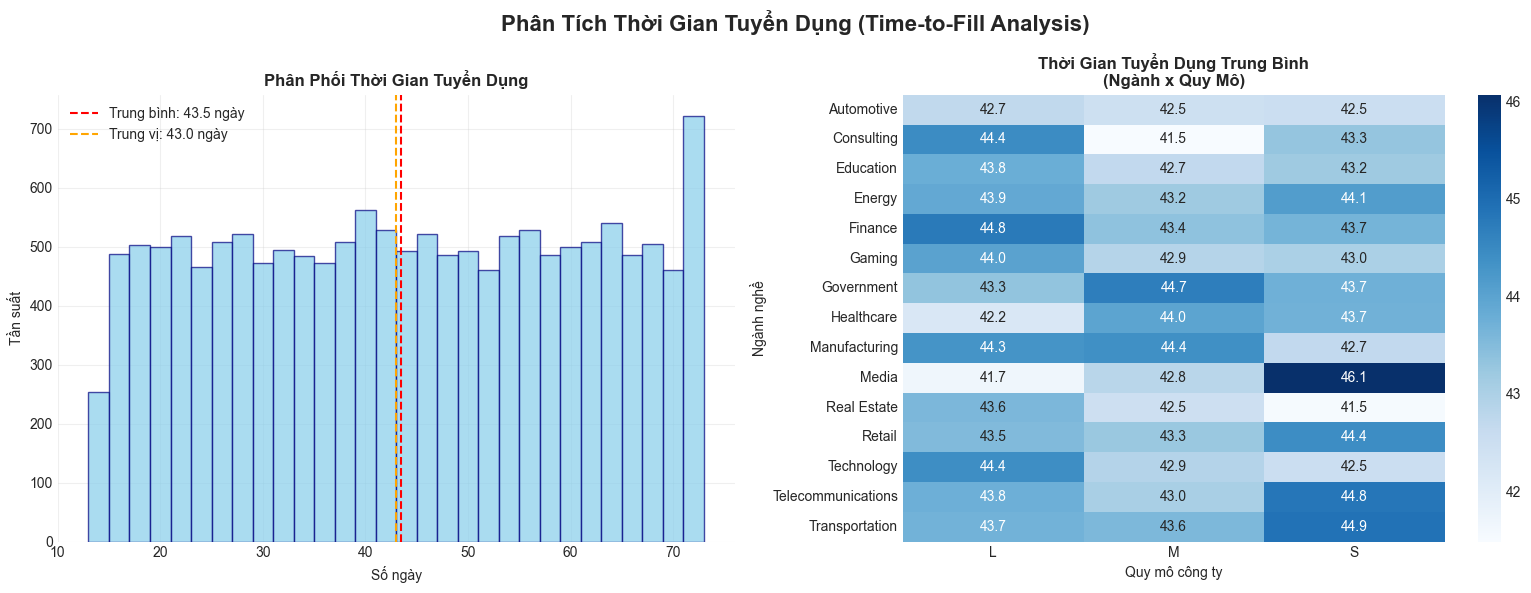

In [34]:
# T√≠nh to√°n th·ªùi gian tuy·ªÉn d·ª•ng (Time-to-Fill)
time_diff = df["application_deadline"] - df["posting_date"] 
df['recruitment_days'] = time_diff.dt.days


# T·∫°o figure v·ªõi subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle('Ph√¢n T√≠ch Th·ªùi Gian Tuy·ªÉn D·ª•ng (Time-to-Fill Analysis)', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. Histogram - Ph√¢n ph·ªëi th·ªùi gian tuy·ªÉn d·ª•ng
axes[0].hist(df['recruitment_days'], bins=30, alpha=0.7, color='skyblue', edgecolor='navy')
axes[0].axvline(df['recruitment_days'].mean(), color='red', linestyle='--', 
                   label=f'Trung b√¨nh: {df["recruitment_days"].mean():.1f} ng√†y')
axes[0].axvline(df['recruitment_days'].median(), color='orange', linestyle='--',
                   label=f'Trung v·ªã: {df["recruitment_days"].median():.1f} ng√†y')
axes[0].set_title('Ph√¢n Ph·ªëi Th·ªùi Gian Tuy·ªÉn D·ª•ng', fontweight='bold')
axes[0].set_xlabel('S·ªë ng√†y')
axes[0].set_ylabel('T·∫ßn su·∫•t')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Heatmap th·ªùi gian tuy·ªÉn d·ª•ng theo ng√†nh v√† quy m√¥
pivot_data = df.groupby(['industry', 'company_size'])['recruitment_days'].mean().reset_index()
pivot_table = pivot_data.pivot(index='industry', columns='company_size', values='recruitment_days')

sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='Blues', ax=axes[1])
axes[1].set_title('Th·ªùi Gian Tuy·ªÉn D·ª•ng Trung B√¨nh\n(Ng√†nh x Quy M√¥)', fontweight='bold')
axes[1].set_xlabel('Quy m√¥ c√¥ng ty')
axes[1].set_ylabel('Ng√†nh ngh·ªÅ')

plt.tight_layout()
plt.show()

**√ù nghƒ©a c·ªßa bi·ªÉu ƒë·ªì**

**1. ƒê·ªëi v·ªõi HR & Nh√† tuy·ªÉn d·ª•ng**
- **Chu·∫©n h√≥a KPI tuy·ªÉn d·ª•ng**  
  - Trung b√¨nh ~43 ng√†y cho m·ªôt v·ªã tr√≠ ‚Üí m·ªëc tham chi·∫øu ƒë·ªÉ ƒë·∫∑t m·ª•c ti√™u r√∫t ng·∫Øn quy tr√¨nh.

- **X√°c ƒë·ªãnh ‚Äún√∫t th·∫Øt‚Äù theo ng√†nh v√† quy m√¥**  
  - Heatmap cho th·∫•y ng√†nh Media (c√¥ng ty S) m·∫•t t·ªõi 46 ng√†y, Consulting (c√¥ng ty M) ch·ªâ ~41,5 ng√†y.  
  - HR bi·∫øt ng√†nh/quy m√¥ n√†o ƒëang ‚Äúkh√°t‚Äù nh√¢n l·ª±c h∆°n, t·ª´ ƒë√≥ tƒÉng ng√¢n s√°ch qu·∫£ng c√°o, headhunt ho·∫∑c t·ªëi ∆∞u JD.

- **Qu·∫£n tr·ªã k·ª≥ v·ªçng Hiring Manager**  
  - D·ªÖ d·ª± b√°o timeline tuy·ªÉn d·ª•ng; ph√≤ng ban c·∫ßn nh√¢n s·ª± g·∫•p c√≥ th·ªÉ ƒë∆∞·ª£c c·∫£nh b√°o s·ªõm.

- **T·ªëi ∆∞u chi·∫øn l∆∞·ª£c ƒë√£i ng·ªô**  
  - Ng√†nh/quy m√¥ c√≥ time-to-fill d√†i ‚áí thi·∫øu ·ª©ng vi√™n ‚áí c√¢n nh·∫Øc tƒÉng l∆∞∆°ng, ph√∫c l·ª£i ƒë·ªÉ r√∫t ng·∫Øn th·ªùi gian tuy·ªÉn.

**2. ƒê·ªëi v·ªõi Ng∆∞·ªùi lao ƒë·ªông & ·ª®ng vi√™n**
- **Qu·∫£n l√Ω k·ª≥ v·ªçng ch·ªù ƒë·ª£i**  
  - Bi·∫øt t·ª´ l√∫c ƒëƒÉng tin t·ªõi h·∫°n ch√≥t th∆∞·ªùng k√©o d√†i ~43 ng√†y ‚Üí b·ªõt lo l·∫Øng khi ch∆∞a nh·∫≠n ph·∫£n h·ªìi ngay.

- **L·∫≠p k·∫ø ho·∫°ch t√¨m vi·ªác ch·ªß ƒë·ªông**  
  - N·∫øu ch·ªçn ng√†nh/company size c√≥ time-to-fill ng·∫Øn (v√≠ d·ª• Consulting-M), chu·∫©n b·ªã h·ªì s∆° s·ªõm v√† ph·∫£n h·ªìi nhanh s·∫Ω tƒÉng c∆° h·ªôi.

- **ƒê√°nh gi√° nhu c·∫ßu th·ªã tr∆∞·ªùng**  
  - Ng√†nh/quy m√¥ m·∫•t nhi·ªÅu ng√†y ƒë·ªÉ l·∫•p v·ªã tr√≠ (Media-S) ph·∫£n √°nh ngu·ªìn cung ·ª©ng vi√™n khan hi·∫øm; k·ªπ nƒÉng ph√π h·ª£p c√≥ gi√° tr·ªã cao h∆°n.

- **T·ªëi ∆∞u l·ªãch tr√¨nh h·ªçc t·∫≠p/n√¢ng c·∫•p k·ªπ nƒÉng**  
  - Kho·∫£ng 1,5 th√°ng ‚Äúbuffer‚Äù gi√∫p ·ª©ng vi√™n tranh th·ªß ho√†n thi·ªán kh√≥a h·ªçc ng·∫Øn ho·∫∑c ch·ª©ng ch·ªâ b·ªï sung tr∆∞·ªõc khi v√≤ng ph·ªèng v·∫•n cu·ªëi.

#### Ph√¢n t√≠ch xu h∆∞·ªõng tuy·ªÉn d·ª•ng theo m√πa l·ªçc theo t·ª´ng ngh·ªÅ/ngh√†nh

In [35]:
def plot_time_value_count(df, job_title='T·∫•t c·∫£', industry='T·∫•t c·∫£', date_type='Ng√†y'):
    d = df.copy()
    
    # L·ªçc theo Job title v√† Industry n·∫øu c·∫ßn
    if job_title != 'T·∫•t c·∫£':
        d = d[d['job_title'] == job_title]
    if industry != 'T·∫•t c·∫£':
        d = d[d['industry'] == industry]
    
    # G√°n period theo l·ª±a ch·ªçn
    if date_type == 'Th√°ng':
        d['time_period'] = d['posting_date'].dt.to_period('M')
    elif date_type == 'Qu√Ω':
        d['time_period'] = d['posting_date'].dt.to_period('Q')
    elif date_type == 'NƒÉm':
        d['time_period'] = d['posting_date'].dt.to_period('Y')
    
    # ƒê·∫øm s·ªë d√≤ng m·ªói period
    time_value_count = (
        d.groupby('time_period')
         .size()
         .reset_index(name='count')
         .sort_values('time_period')  
    )

    # V·∫Ω bi·ªÉu ƒë·ªì
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=time_value_count['time_period'].astype(str),
        y=time_value_count['count'],
        color='steelblue'
    )
    plt.title('S·ªë l∆∞·ª£ng tuy·ªÉn d·ª•ng theo th·ªùi gian', fontweight='bold')
    plt.xlabel('Th·ªùi gian')
    plt.ylabel('S·ªë l∆∞·ª£ng tuy·ªÉn d·ª•ng')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Widget t∆∞∆°ng t√°c (ƒë·∫∑t t√™n kh√°c ƒë·ªÉ tr√°nh ƒë√®)
@interact(
    job_title = widgets.Dropdown(
        options=['T·∫•t c·∫£'] + sorted(df['job_title'].unique()),
        value='T·∫•t c·∫£',
        description='Job Title'
    ),
    industry = widgets.Dropdown(
        options=['T·∫•t c·∫£'] + sorted(df['industry'].unique()),
        value='T·∫•t c·∫£',
        description='Industry'
    ),
    date_type = widgets.Dropdown(
        options=['Th√°ng', 'Qu√Ω', 'NƒÉm'],
        value='Th√°ng',
        description='Date Type'
    )
)
def _interactive(job_title, industry, date_type):
    plot_time_value_count(df, job_title, industry, date_type)

interactive(children=(Dropdown(description='Job Title', options=('T·∫•t c·∫£', 'AI Architect', 'AI Consultant', 'A‚Ä¶

**L·ª£i √≠ch c·ªßa bi·ªÉu ƒë·ªì ‚ÄúS·ªë l∆∞·ª£ng tuy·ªÉn d·ª•ng theo th·ªùi gian"**

**1. ƒê·ªëi v·ªõi HR & Nh√† tuy·ªÉn d·ª•ng**
- **Ph√°t hi·ªán m√πa v·ª• tuy·ªÉn d·ª•ng**  
  Quan s√°t th·ªùi ƒëi·ªÉm s·ªë b√†i ƒëƒÉng tƒÉng cao ƒë·ªÉ chu·∫©n b·ªã ng√¢n s√°ch, ƒë·ªôi ng≈© tuy·ªÉn d·ª•ng v√† chi·∫øn d·ªãch truy·ªÅn th√¥ng s·ªõm h∆°n.
- **ƒê√°nh gi√° hi·ªáu qu·∫£ chi·∫øn d·ªãch**  
  Sau m·ªói ƒë·ª£t tuy·ªÉn d·ª•ng di·ªán r·ªông, so s√°nh s·ªë b√†i ƒëƒÉng tr∆∞·ªõc v√† sau chi·∫øn d·ªãch ƒë·ªÉ ƒëo m·ª©c ƒë·ªô c·∫ßn thi·∫øt c·ªßa vi·ªác t√°i s·ª≠ d·ª•ng ho·∫∑c ƒëi·ªÅu ch·ªânh k√™nh tuy·ªÉn d·ª•ng.
- **X√°c ƒë·ªãnh nhu c·∫ßu theo ch·ª©c danh/ng√†nh**  
  V·ªõi b·ªô l·ªçc `Job Title` v√† `Industry`, HR nhanh ch√≥ng th·∫•y vai tr√≤ hay ng√†nh n√†o ƒëang khan ·ª©ng vi√™n ƒë·ªÉ ∆∞u ti√™n ngu·ªìn l·ª±c headhunt.
- **D·ª± b√°o kh·ªëi l∆∞·ª£ng c√¥ng vi·ªác ph√≤ng Talent Acquisition**  
  Bi·∫øt ƒë∆∞·ª£c th√°ng/qu√Ω n√†o cao ƒëi·ªÉm ƒë·ªÉ ph√¢n b·ªï nh√¢n s·ª±, KPI v√† timeline ph·ªèng v·∫•n ph√π h·ª£p.

**2. ƒê·ªëi v·ªõi Ng∆∞·ªùi lao ƒë·ªông & ·ª®ng vi√™n**
- **T√¨m ‚Äúth·ªùi ƒëi·ªÉm v√†ng‚Äù ·ª©ng tuy·ªÉn**  
  Nh·ªù xu h∆∞·ªõng tƒÉng b√†i ƒëƒÉng, ·ª©ng vi√™n bi·∫øt l√∫c n√†o c∆° h·ªôi cao nh·∫•t ƒë·ªÉ n·ªôp h·ªì s∆°.
- **Ch·ªçn ng√†nh/role ƒëang ‚Äúhot‚Äù**  
  L·ªçc theo `Job Title` ho·∫∑c `Industry` gi√∫p th·∫•y v·ªã tr√≠ n√†o tƒÉng nhanh ‚Üí ƒë·ªãnh v·ªã b·∫£n th√¢n, ƒë·∫ßu t∆∞ h·ªçc k·ªπ nƒÉng t∆∞∆°ng ·ª©ng.
- **L·∫≠p k·∫ø ho·∫°ch ph√°t tri·ªÉn ngh·ªÅ nghi·ªáp**  
  Quan s√°t chu k·ª≥ tƒÉng gi·∫£m (m√πa tuy·ªÉn intern, graduate program‚Ä¶) ƒë·ªÉ chu·∫©n b·ªã portfolio, ch·ª©ng ch·ªâ ƒë√∫ng th·ªùi ƒëi·ªÉm.
- **ƒê·ªëi chi·∫øu m·ª©c ƒë·ªô c·∫°nh tranh**  
  Khi s·ªë l∆∞·ª£ng b√†i ƒëƒÉng gi·∫£m nh∆∞ng m·ª©c l∆∞∆°ng v·∫´n cao (qua bi·ªÉu ƒë·ªì kh√°c), ·ª©ng vi√™n hi·ªÉu th·ªã tr∆∞·ªùng ƒëang khan hi·∫øm ‚Üí c√≥ c∆° s·ªü ƒë√†m ph√°n l∆∞∆°ng t·ªët h∆°n.

#### Ph√¢n t√≠ch ROI c·ªßa B·∫±ng C·∫•p (Education ROI):

1. So s√°nh m·ª©c l∆∞∆°ng trung v·ªã gi·ªØa c√°c c·∫•p ƒë·ªô h·ªçc v·∫•n cho filter theo c·∫•p b·∫≠c kinh nghi·ªám, c√¥ng vi·ªác, ngh√†nh

In [36]:
def salary_by_edu_require(df, experience_level, industry, job_titles):
    d = df.copy()
    if experience_level != 'T·∫•t c·∫£':
        d = d[d['experience_level'] == experience_level]
    if job_titles != 'T·∫•t c·∫£':
        d = d[d['job_title'] == job_titles]
    if industry != 'T·∫•t c·∫£':
        d = d[d['industry'] == industry]

    plt.figure(figsize=(10, 6))
    
    sns.boxplot(
        x='education_required',
        y='salary_usd',
        data=d,
        color='skyblue'
    )
    
    plt.title(f'Ph√¢n ph·ªëi l∆∞∆°ng theo y√™u c·∫ßu h·ªçc v·∫•n\nC·∫•p b·∫≠c: {experience_level} | Ng√†nh: {industry}', fontsize=16, fontweight='bold')
    plt.xlabel('Y√™u c·∫ßu h·ªçc v·∫•n')
    plt.ylabel('L∆∞∆°ng (USD)')
    plt.tight_layout()
    plt.show()

@interact(
    experience_level=widgets.Dropdown(
        options=['T·∫•t c·∫£'] + sorted(df['experience_level'].unique()),
        value='T·∫•t c·∫£',
        description='C·∫•p b·∫≠c'
    ),
    industry=widgets.Dropdown(
        options=['T·∫•t c·∫£'] + sorted(df['industry'].unique()),
        value='T·∫•t c·∫£',
        description='Ng√†nh'
    ),
    job_titles=widgets.Dropdown(
        options=['T·∫•t c·∫£'] + sorted(df['job_title'].unique()),
        value='T·∫•t c·∫£',
        description='Lo·∫°i CV'
    )
)
def interactive_salary_by_edu_require(experience_level, industry, job_titles):
    salary_by_edu_require(df, experience_level, industry, job_titles)

interactive(children=(Dropdown(description='C·∫•p b·∫≠c', options=('T·∫•t c·∫£', 'EN', 'EX', 'MI', 'SE'), value='T·∫•t c‚Ä¶


**L·ª£i √≠ch c·ªßa bi·ªÉu ƒë·ªì**

**1. ƒê·ªëi v·ªõi HR & Nh√† tuy·ªÉn d·ª•ng**
- **X√¢y d·ª±ng khung l∆∞∆°ng ch√≠nh x√°c:** Bi·ªÉu ƒë·ªì gi√∫p HR x√°c ƒë·ªãnh kho·∫£ng l∆∞∆°ng (range) v√† m·ª©c l∆∞∆°ng trung v·ªã (median) t∆∞∆°ng ·ª©ng v·ªõi t·ª´ng c·∫•p ƒë·ªô h·ªçc v·∫•n. ƒêi·ªÅu n√†y gi√∫p t·∫°o ra thang b·∫£ng l∆∞∆°ng c·∫°nh tranh v√† c√¥ng b·∫±ng, tr√°nh tr·∫£ l∆∞∆°ng qu√° cao ho·∫∑c qu√° th·∫•p so v·ªõi th·ªã tr∆∞·ªùng.
- **T·ªëi ∆∞u h√≥a y√™u c·∫ßu tuy·ªÉn d·ª•ng:** HR c√≥ th·ªÉ ƒë√°nh gi√° li·ªáu vi·ªác y√™u c·∫ßu b·∫±ng c·∫•p cao h∆°n (v√≠ d·ª•: PhD so v·ªõi Master) c√≥ th·ª±c s·ª± mang l·∫°i ch√™nh l·ªách l·ªõn v·ªÅ nƒÉng su·∫•t v√† m·ª©c l∆∞∆°ng hay kh√¥ng. N·∫øu kh√¥ng, h·ªç c√≥ th·ªÉ n·ªõi l·ªèng y√™u c·∫ßu ƒë·ªÉ m·ªü r·ªông ngu·ªìn ·ª©ng vi√™n ti·ªÅm nƒÉng.
- **Ho·∫°ch ƒë·ªãnh ng√¢n s√°ch ƒë√†o t·∫°o:** Khi xem x√©t h·ªó tr·ª£ nh√¢n vi√™n h·ªçc cao h∆°n, HR c√≥ th·ªÉ s·ª≠ d·ª•ng bi·ªÉu ƒë·ªì n√†y ƒë·ªÉ d·ª± b√°o v·ªÅ "Return on Investment (ROI)", t·ª©c l√† m·ª©c tƒÉng l∆∞∆°ng k·ª≥ v·ªçng sau khi nh√¢n vi√™n ho√†n th√†nh kh√≥a h·ªçc, t·ª´ ƒë√≥ ra quy·∫øt ƒë·ªãnh ƒë·∫ßu t∆∞ hi·ªáu qu·∫£.

**2. ƒê·ªëi v·ªõi Ng∆∞·ªùi lao ƒë·ªông & ·ª®ng vi√™n**
- **ƒê·ªãnh h∆∞·ªõng ph√°t tri·ªÉn v√† h·ªçc t·∫≠p:** Sinh vi√™n ho·∫∑c ng∆∞·ªùi ƒëi l√†m c√≥ th·ªÉ th·∫•y r√µ vi·ªác ƒë·∫ßu t∆∞ v√†o h·ªçc v·∫•n cao h∆°n (nh∆∞ Th·∫°c sƒ©, Ti·∫øn sƒ©) ·∫£nh h∆∞·ªüng ƒë·∫øn m·ª©c l∆∞∆°ng nh∆∞ th·∫ø n√†o. ƒê√¢y l√† c∆° s·ªü d·ªØ li·ªáu quan tr·ªçng ƒë·ªÉ h·ªç quy·∫øt ƒë·ªãnh c√≥ n√™n h·ªçc l√™n hay kh√¥ng.
- **C√¥ng c·ª• ƒë√†m ph√°n l∆∞∆°ng hi·ªáu qu·∫£:** ·ª®ng vi√™n c√≥ th·ªÉ s·ª≠ d·ª•ng d·ªØ li·ªáu n√†y ƒë·ªÉ bi·∫øt m·ª©c l∆∞∆°ng ph·ªï bi·∫øn tr√™n th·ªã tr∆∞·ªùng cho tr√¨nh ƒë·ªô h·ªçc v·∫•n c·ªßa m√¨nh, t·ª´ ƒë√≥ ƒë∆∞a ra m·ªôt m·ª©c l∆∞∆°ng ƒë·ªÅ ngh·ªã h·ª£p l√Ω v√† c√≥ c∆° s·ªü v·ªØng ch·∫Øc khi th∆∞∆°ng l∆∞·ª£ng.
- **ƒê·∫∑t k·ª≥ v·ªçng th·ª±c t·∫ø:** Bi·ªÉu ƒë·ªì gi√∫p ng∆∞·ªùi t√¨m vi·ªác hi·ªÉu r√µ gi√° tr·ªã c·ªßa b·∫±ng c·∫•p trong c√°c ng√†nh v√† c·∫•p b·∫≠c kinh nghi·ªám kh√°c nhau, tr√°nh ƒë·∫∑t k·ª≥ v·ªçng qu√° cao ho·∫∑c qu√° th·∫•p khi ·ª©ng tuy·ªÉn.
